# Table of Contents

* <a href='#1'>1. Prerequisites</a>  
  - <a href='#11'>1.1. Load Libraries</a>  
  - <a href='#12'>1.2. Settings And Global Variables</a>
  - <a href='#13'>1.3. Load Data</a>
* <a href='#2'>2. Data Overview</a>
  - <a href='#21'>2.1. Data Summary</a>
  - <a href='#22'>2.2. Missing Data Distribution</a>
* <a href='#3'>3. Basic Exploratory Data Analysis</a>
  - <a href='#31'>3.1. Donation Amounts</a>
  - <a href='#32'>3.2. Donation Included Optional Donation</a>
  - <a href='#33'>3.3. Donor Cart Sequence</a>
  - <a href='#34'>3.4. Teacher Project Posted Sequence</a>
  - <a href='#35'>3.5. Project Type</a>
  - <a href='#36'>3.6. Project Subject Category Tree</a>
  - <a href='#37'>3.7. Project Subject Subcategory Tree</a>
  - <a href='#38'>3.8. Project Grade Level Category</a>
  - <a href='#39'>3.9. Project Resource Category</a>
  - <a href='#310'>3.10. Project Cost</a>
  - <a href='#311'>3.11. Project Current Status</a>
  - <a href='#312'>3.12. Donor Distribution Among States</a>
  - <a href='#313'>3.13. Donor Is Teacher</a>
  - <a href='#314'>3.14. Resource Costs</a>
  - <a href='#315'>3.15. School Type</a>
  - <a href='#316'>3.16. School Percentage Free Lunch</a>
  - <a href='#317'>3.17. School Locations Distribution Among States</a>
  - <a href='#318'>3.18. Teacher Prefix</a>
  - <a href='#319'>3.19. Top 100 Donor Distribution Among Cities</a>
  - <a href='#320'>3.20. Top Resource Vendors</a>
  - <a href='#321'>3.21. Top Keywords From Project Title</a>
  - <a href='#322'>3.22. Top Keywords From Project Essay</a>
  - <a href='#323'>3.23. Top Keywords From Project Short Description</a>
  - <a href='#324'>3.24. Top Keywords From Project Need Statement</a>
* <a href='#4'>4. In-Depth Exploratory Data Analysis</a>
  - <a href='#41'>4.1. Donation Amounts vs. Project Cost</a>
  - <a href='#42'>4.2. Project Costs vs. Resource Costs</a>
* <a href='#5'>5. Time Series Analysis</a>
  - <a href='#51'>5.1. Time Series Visualization</a>
    + <a href='#511'>5.1.1. Project Posted vs. Expired Date</a>
    + <a href='#512'>5.1.2. Project Fully Funded Date</a>
    + <a href='#513'>5.1.3. Teacher First Project Posted Date</a>
    + <a href='#514'>5.1.4. Donations</a>
      - <a href='#5141'>5.1.4.1. Donation Amounts and Counts</a>
      - <a href='#5142'>5.1.4.2. Donation Counts and Average by Month</a>
      - <a href='#5143'>5.1.4.3. Donation Counts and Average by Weekday</a>
    + <a href='#515'>5.1.5. Trend of Donations Among States</a>
    + <a href='#516'>5.1.6. Trend of Top 10 Cities of Donations</a>
  - <a href='#52'>5.2. Time Series Modeling</a>
    + <a href='#521'>5.2.1. Trend of Project Posted Counts</a>
    + <a href='#522'>5.2.2. Trend of Project Expiration Counts</a>
    + <a href='#523'>5.2.3. Trend of First Posted Project</a>
    + <a href='#524'>5.2.4. Trend of Donation Amounts</a>
    
This notebook is always under progress. Please feel free to leave comments below for any suggestion or mistakes.

# <a id='1'>1. Prerequisites</a>

## <a id='11'>1.1 Load Libraries</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as offline
offline.init_notebook_mode(connected=True)

import plotly.graph_objs as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from geopy.geocoders import Nominatim
import gc
import time

Using TensorFlow backend.


## <a id='12'>1.2. Settings And Global Variables</a>

In [2]:
# Data directory
data_dir = './input/'
sns.set()

## <a id='13'>1.3. Load Data</a>

In [3]:
donations = pd.read_csv(data_dir+"Donations.csv",error_bad_lines=False)
projects = pd.read_csv(data_dir+"Projects.csv",error_bad_lines=False)
donors = pd.read_csv(data_dir+"Donors.csv",error_bad_lines=False)
resources = pd.read_csv(data_dir+"Resources.csv",error_bad_lines=False)
schools = pd.read_csv(data_dir+"Schools.csv",error_bad_lines=False)
teachers = pd.read_csv(data_dir+"Teachers.csv",error_bad_lines=False)

/homes/li2566/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning:

Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.



# <a id='2'>2. Data Overview</a>

## <a id='21'>2.1. Data Summary</a>

In [4]:
donors.describe()

,Donor ID,Donor City,Donor State,Donor Is Teacher,Donor Zip
count,2122640,1909543,2122640,2122640,1942580
unique,2122640,15204,52,2,1934
top,f3af0345aa33da330ff360b18712fcb1,Chicago,California,No,606
freq,1,34352,294695,1910355,34628


In [5]:
donations.describe(include='all')

,Project ID,Donation ID,Donor ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date
count,4687884,4687884,4687884,4687884,4.687884e+06,4.687884e+06,4687884
unique,901965,4687844,2024554,2,NaN,NaN,4066370
top,c34218abf3fecd36be01305d67ed7fbb,dcc1c4772a5f8d5882fd31dd133252e4,39df9399f5384334a42905bcf0acdcbf,Yes,NaN,NaN,2018-03-08 12:51:27
freq,863,2,18035,4001709,NaN,NaN,72
mean,NaN,NaN,NaN,NaN,6.066879e+01,1.430545e+02,NaN
std,NaN,NaN,NaN,NaN,1.668996e+02,8.723086e+02,NaN
min,NaN,NaN,NaN,NaN,1.000000e-02,1.000000e+00,NaN
25%,NaN,NaN,NaN,NaN,1.482000e+01,1.000000e+00,NaN
50%,NaN,NaN,NaN,NaN,2.500000e+01,2.000000e+00,NaN
75%,NaN,NaN,NaN,NaN,5.000000e+01,1.200000e+01,NaN


In [6]:
projects.describe(include='all')

,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Project Current Status,Project Fully Funded Date
count,1110017,1110017,1110017,1.110017e+06,1110017,1110011,1110016,1110014,1110014,1109988,1109988,1110017,1109981,1.110017e+06,1110017,1110003,1110017,826764
unique,1110015,72361,395706,NaN,3,926127,1108272,841893,1080023,51,432,5,17,NaN,1947,2102,3,1957
top,c940d0e78b7559573aca536db90c0646,7f0412c9ac3cea57048543879e4e6318,fa2f220b537e8653fb48878ebb38044d,NaN,Teacher-Led,Flexible Seating,Remember all the required reading you did as a...,As a teacher in a low-income/high poverty scho...,My students need a document camera.,Literacy & Language,"Literacy, Mathematics",Grades PreK-2,Supplies,NaN,2018-03-30,2018-07-28,Fully Funded,2018-03-27
freq,2,1752,320,NaN,1092163,1107,14,2139,578,250504,93286,432002,386074,NaN,8479,13637,826764,36039
mean,NaN,NaN,NaN,1.124050e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.415240e+02,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,2.595475e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.083256e+03,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.529000e+01,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.351200e+02,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,3.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.153500e+02,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,9.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.675200e+02,NaN,NaN,NaN,NaN


In [7]:
resources.describe(include='all')

,Project ID,Resource Item Name,Resource Quantity,Resource Unit Price,Resource Vendor Name
count,7210448,7209887,7.186149e+06,7.186138e+06,7128454
unique,1208649,1073886,NaN,NaN,31
top,07a021f92447be2ef4a6cb955bc4c1d1,trip,NaN,NaN,Amazon Business
freq,367,21233,NaN,NaN,3203262
mean,NaN,NaN,2.816518e+00,5.341337e+01,NaN
std,NaN,NaN,8.866547e+00,1.863248e+02,NaN
min,NaN,NaN,0.000000e+00,0.000000e+00,NaN
25%,NaN,NaN,1.000000e+00,7.260000e+00,NaN
50%,NaN,NaN,1.000000e+00,1.439000e+01,NaN
75%,NaN,NaN,2.000000e+00,3.640000e+01,NaN


In [8]:
schools.describe(include='all')

,School ID,School Name,School Metro Type,School Percentage Free Lunch,School State,School Zip,School City,School County,School District
count,72993,72993,72993,71852.000000,72993,72993.000000,72766,72991,72993
unique,72993,56831,5,NaN,51,NaN,10400,1782,10852
top,cbbfe20be025373c738c745227815b0f,Lincoln Elementary School,suburban,NaN,California,NaN,New York City,Los Angeles,New York City Dept Of Ed
freq,1,203,22992,NaN,8457,NaN,2051,2110,1718
mean,NaN,NaN,NaN,58.556115,NaN,53382.093406,NaN,NaN,NaN
std,NaN,NaN,NaN,25.508378,NaN,29131.096568,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,NaN,705.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,40.000000,NaN,29554.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,61.000000,NaN,53095.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,80.000000,NaN,78572.000000,NaN,NaN,NaN


In [9]:
teachers.describe(include='all')

,Teacher ID,Teacher Prefix,Teacher First Project Posted Date
count,402900,402872,402900
unique,402900,6,4699
top,b5122128d8474e7f64e30f3673fbce14,Mrs.,2015-09-13
freq,1,202142,2067


## <a id='22'>2.2. Missing Data Distribution</a>

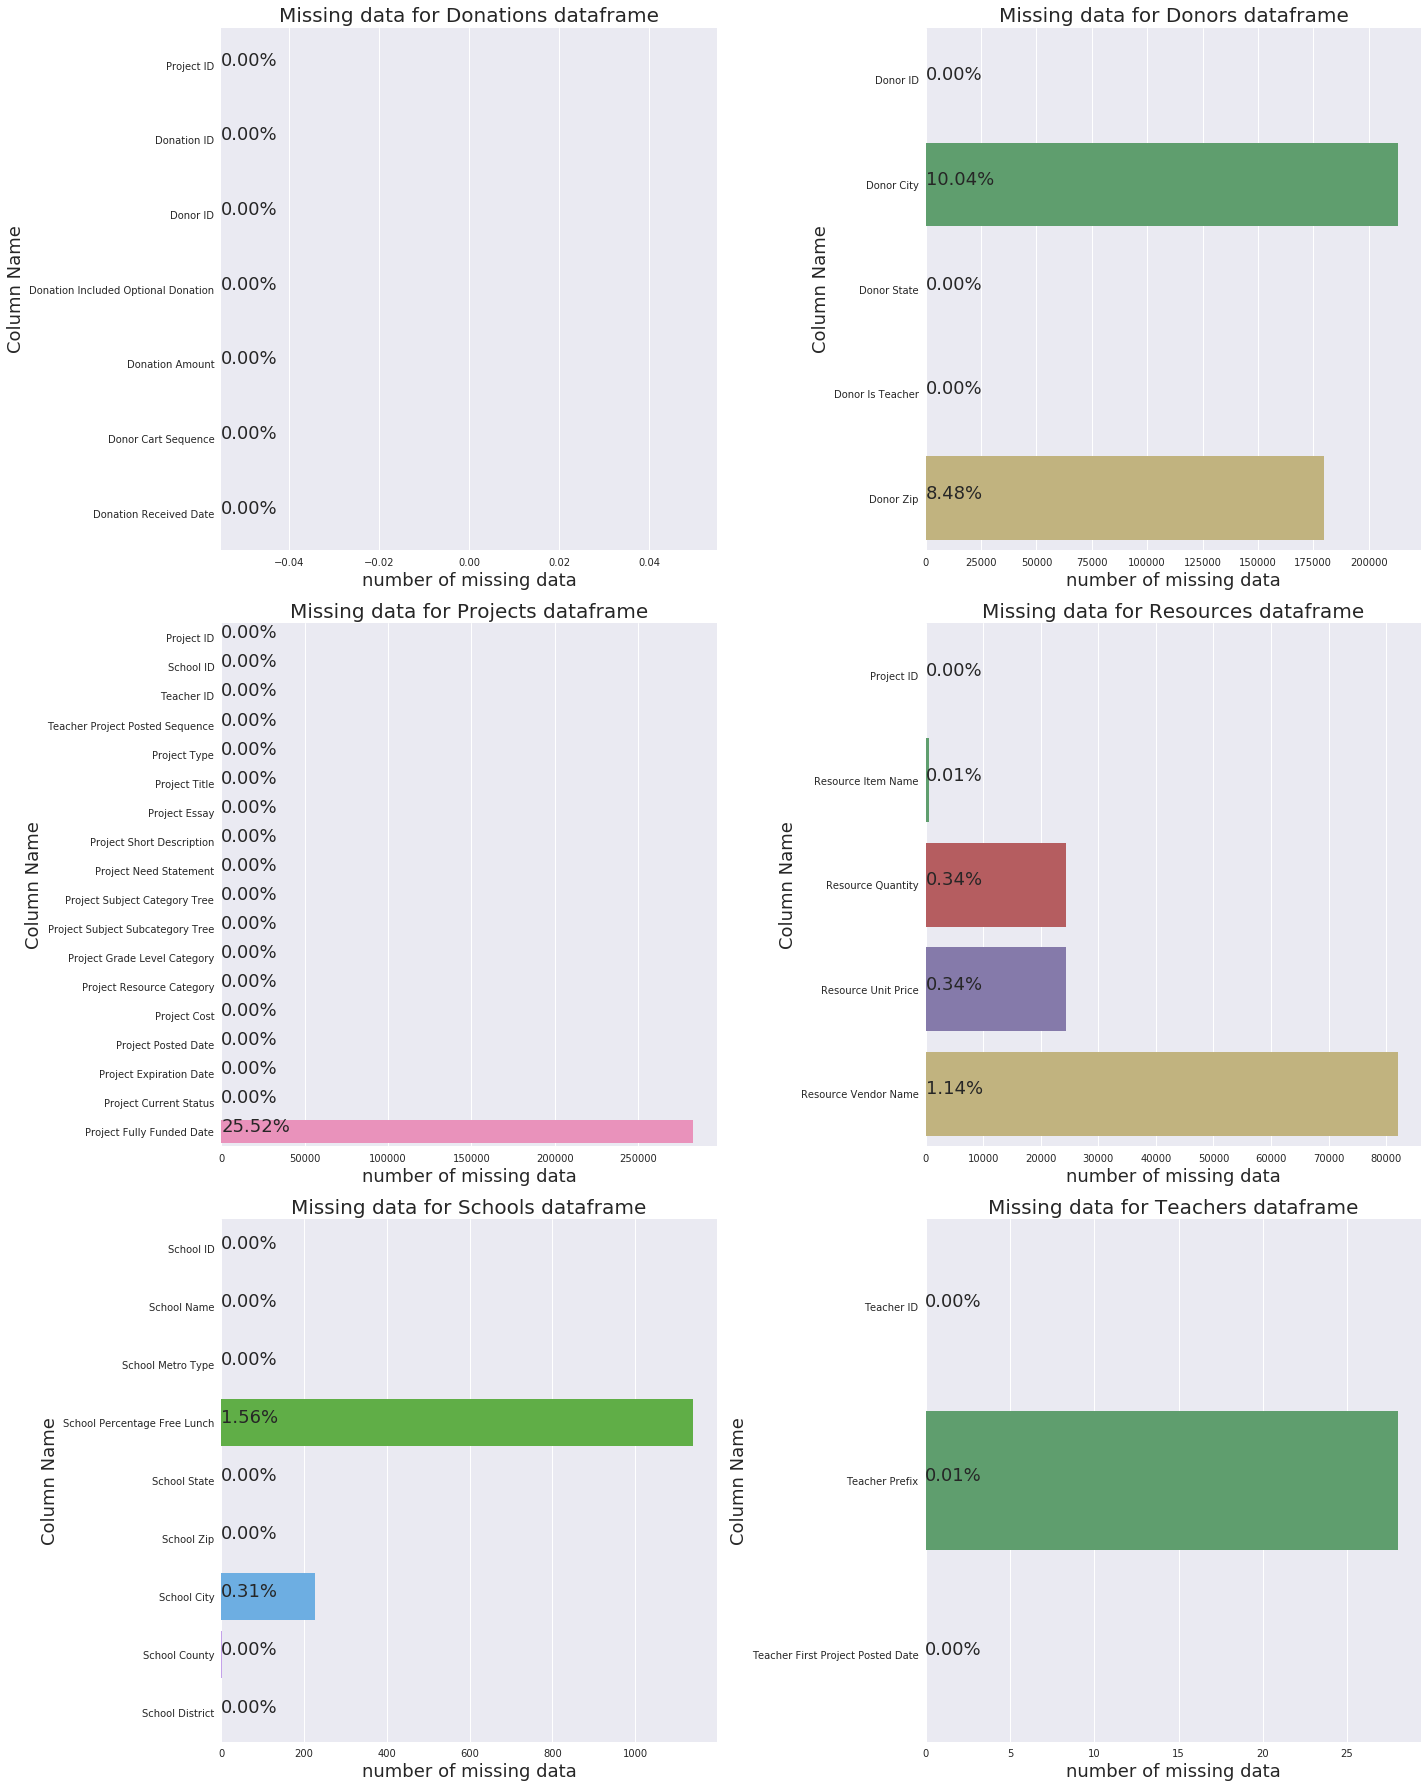

In [10]:
names = ['Donations','Donors','Projects','Resources','Schools','Teachers']
datum = [donations,donors,projects,resources,schools,teachers]
fig = plt.figure(figsize=(20,25))
for i,data in enumerate(datum):
    ax = fig.add_subplot(int(str(32)+str(i+1)))
    null_pct = data.isnull().sum()
    sns.barplot(null_pct.values,null_pct.index,ax = ax)

    for idx,value in enumerate(null_pct.values):
        ax.text(-0.055,idx,"{:.2f}%".format(float(value)/len(data)*100),fontsize=18)
    ax.set_xlabel("number of missing data",fontsize=18)
    ax.set_ylabel("Column Name",fontsize=18)
    ax.set_title("Missing data for {} dataframe".format(names[i]),fontsize=20)
    
plt.tight_layout()

# <a id='3'>3. Basic Exploratory Data Analysis</a>

## <a id='31'>3.1. Donation Amounts</a>

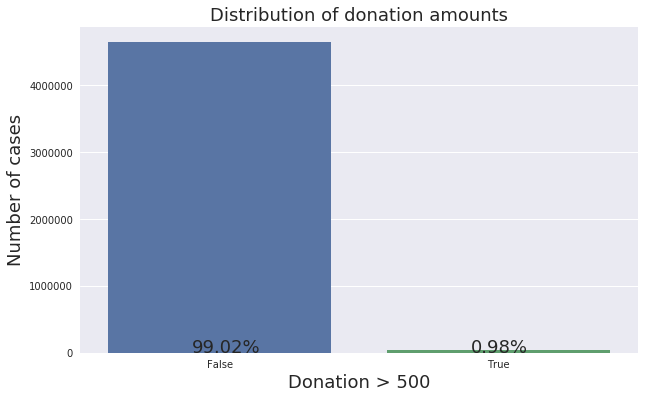

In [11]:
plt.figure(figsize=(10,6))
threshold = 500

temp = donations[["Donation Amount"]].dropna(inplace=False)
temp["large_amount"] = temp["Donation Amount"] > threshold
temp = temp.groupby(["large_amount"]).count().reset_index()
sns.barplot(x='large_amount',y='Donation Amount',data=temp)
plt.xlabel("Donation > {}".format(threshold),fontsize=18)
plt.ylabel("Number of cases",fontsize=18)
plt.title("Distribution of donation amounts",fontsize=18)
for i,v in enumerate(temp.large_amount.values):
    plt.text(i-0.1,0,"{:.2f}%".format(temp['Donation Amount'].values[i]/float(temp['Donation Amount'].sum())*100),fontsize=18)

It seems most of donations are less than 1000 dollars. We can focus on this range and see the distribution.

/homes/li2566/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



Text(0.5,1,'Distribution of donation amounts')

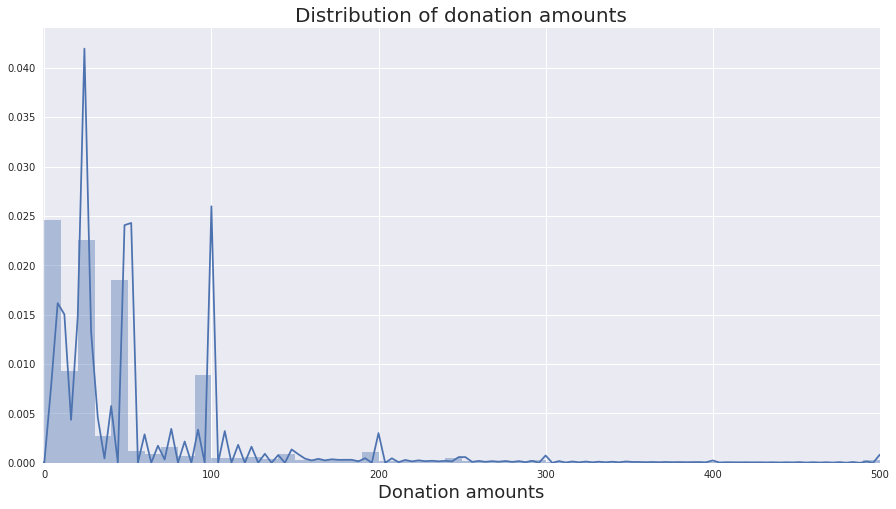

In [12]:
plt.figure(figsize=(15,8))
temp = donations[donations["Donation Amount"] <= threshold]['Donation Amount']
ax = sns.distplot(temp,bins=50)
ax.set_xlim([-1,threshold])
plt.xlabel("Donation amounts",fontsize=18)
plt.title("Distribution of donation amounts",fontsize=20)

We learn most of donations are about 20~30 dollars, then 50~60 dollars and <10 dollars.

## <a id='332'>3.2. Donation Included Optional Donation</a>

Text(0.5,1,'Donation Included Optional Donation')

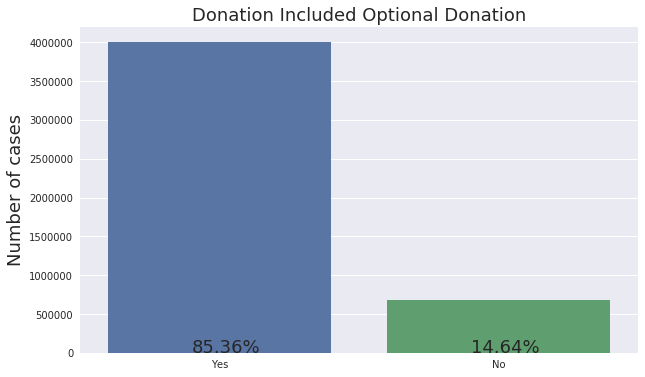

In [13]:
plt.figure(figsize=(10,6))
donation_optional = donations['Donation Included Optional Donation'].value_counts().reset_index()
sns.barplot(x='index',y='Donation Included Optional Donation',data=donation_optional)
for i,v in enumerate(donation_optional['Donation Included Optional Donation'].values):
    plt.text(i-0.1,0,"{:.2f}%".format(float(v)/donation_optional['Donation Included Optional Donation'].values.sum()*100),fontsize=18)
#plt.xticks(rotation=90)
plt.ylabel("Number of cases",fontsize=18)
plt.xlabel("")
plt.title("Donation Included Optional Donation",fontsize=18)

We know over 80% of donations include optional donation.

## <a id='33'>3.3. Donor Cart Sequence</a>

Text(0.5,1,'Top 20 Donor Cart Sequence')

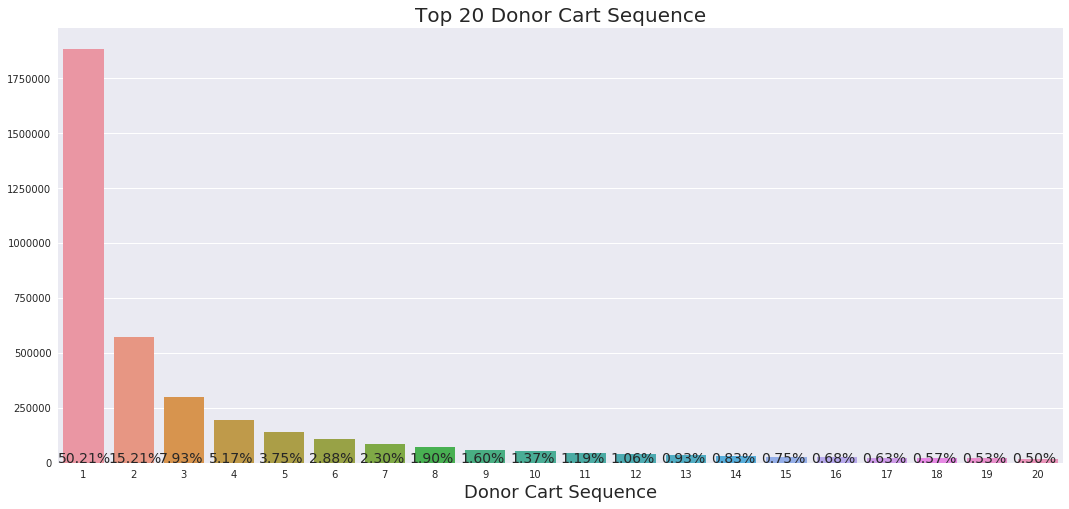

In [14]:
top = 20
plt.figure(figsize=(18,8))
donation_cart = donations['Donor Cart Sequence'].dropna().value_counts().reset_index()[:top]
sns.barplot(x='index',y='Donor Cart Sequence',data=donation_cart)
for i,v in enumerate(donation_cart['Donor Cart Sequence'].values):
    plt.text(i-0.5,0,"{:.2f}%".format(float(v)/donation_cart['Donor Cart Sequence'].values.sum()*100),fontsize=14)
#plt.xticks(rotation=90)
plt.ylabel("")
plt.xlabel("Donor Cart Sequence",fontsize=18)
plt.title("Top {} Donor Cart Sequence".format(top),fontsize=20)

## <a id='34'>3.4. Teacher Project Posted Sequence</a>

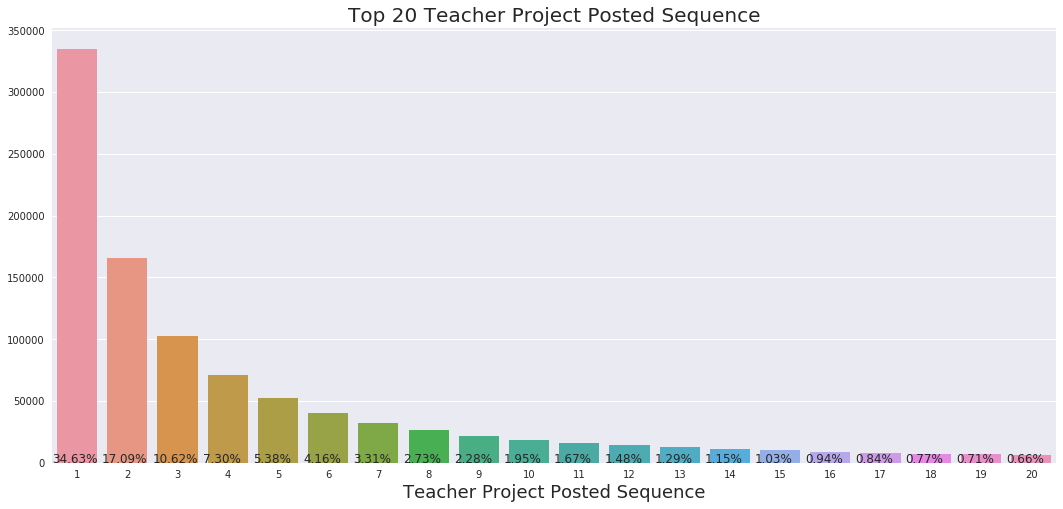

In [15]:
top = 20
temp = projects["Teacher Project Posted Sequence"].value_counts().sort_values(ascending=False)[:top]
plt.figure(figsize=(18,8))
sns.barplot(temp.index,temp.values)
plt.ylabel("")
plt.xlabel("Teacher Project Posted Sequence",fontsize=18)
plt.title("Top {} Teacher Project Posted Sequence".format(top),fontsize=20)
total = temp.sum()
for i,v in enumerate(temp):
    plt.text(i-0.5,0,"{:.2f}%".format(float(v)/total*100))

Since lack of description of "Teacher Project Posted Sequence", we don't know what it is. But we know the distribution is like exponential distribution.

## <a id='35'>3.5. Project Type</a>

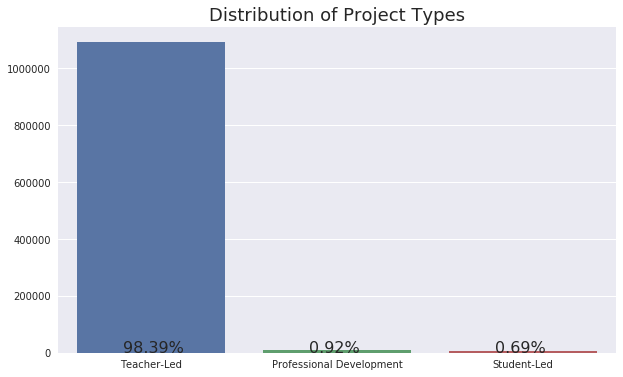

In [16]:
temp = projects["Project Type"].value_counts().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(y='Project Type',x='index',data=temp)
plt.ylabel("")
plt.xlabel("")
plt.title("Distribution of Project Types",fontsize=18)
total = temp["Project Type"].sum()
for i,v in enumerate(temp["Project Type"]):
    plt.text(i-0.15,0,"{:.2f}%".format(float(v)/total*100),fontsize=16)

It is obvious that most of projects are led by teachers.

## <a id='36'>3.6. Project Subject Category Tree</a>

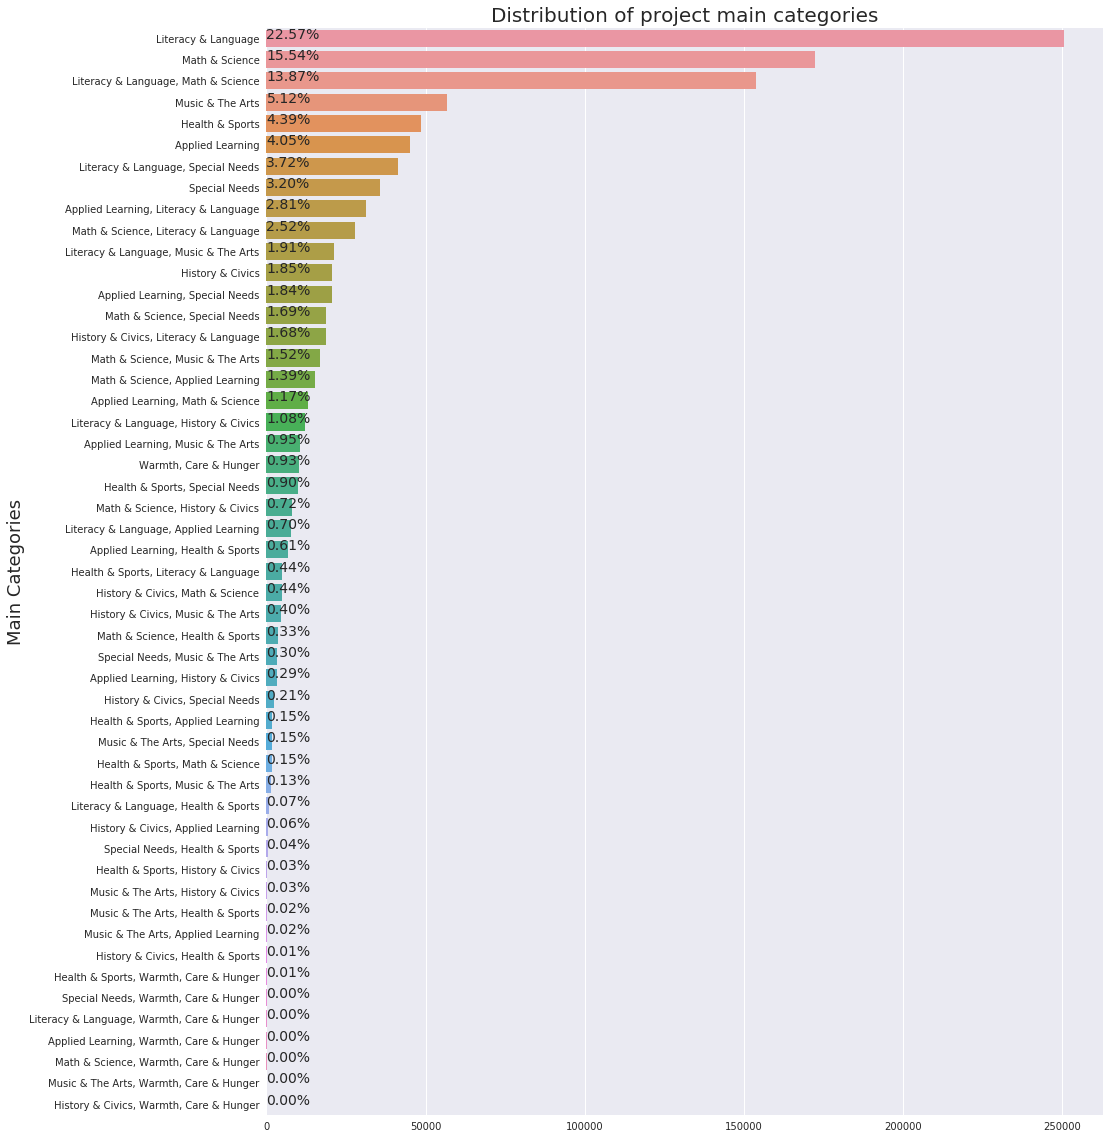

In [17]:
temp = projects['Project Subject Category Tree'].value_counts().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,20))
sns.barplot(x='Project Subject Category Tree',y='index',data=temp)
total = temp['Project Subject Category Tree'].sum()
plt.xlabel("")
plt.ylabel("Main Categories",fontsize=18)
plt.title("Distribution of project main categories",fontsize=20)
for i,v in enumerate(temp['Project Subject Category Tree']):
    plt.text(0,i,"{:.2f}%".format(float(v)/total*100),fontsize=14)

The top1 category is `"Literacy&Language"`, then `"Math&Science"` and `"Literacy&Language,Math&Science"`

## <a id='37'>3.7. Project Subject Subcategory Tree</a>

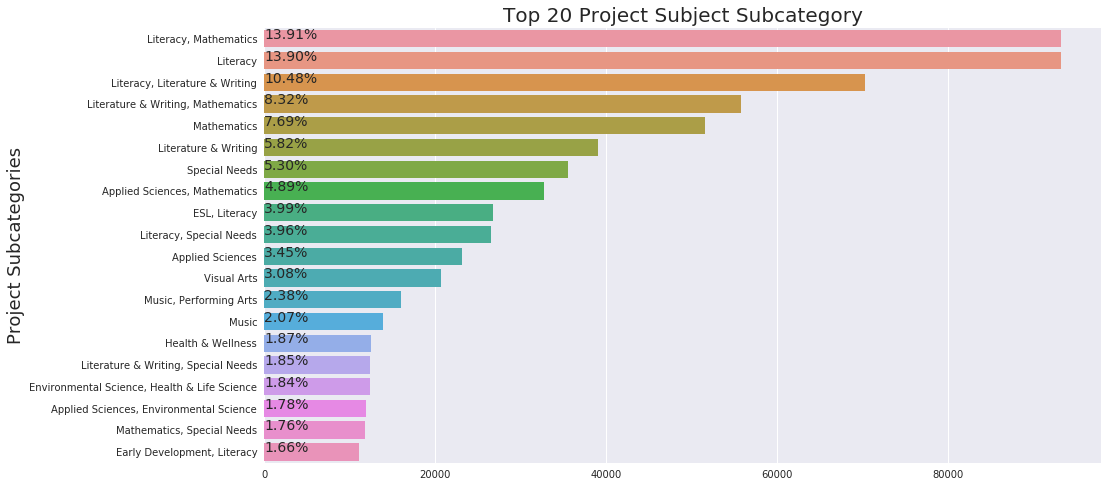

In [18]:
top = 20
temp = projects['Project Subject Subcategory Tree'].value_counts().sort_values(ascending=False).reset_index()[:top]
plt.figure(figsize=(15,8))
sns.barplot(x='Project Subject Subcategory Tree',y='index',data=temp)
total = temp['Project Subject Subcategory Tree'].sum()
plt.xlabel("")
plt.ylabel("Project Subcategories",fontsize=18)
plt.title("Top {} Project Subject Subcategory".format(top),fontsize=20)
for i,v in enumerate(temp['Project Subject Subcategory Tree']):
    plt.text(0,i,"{:.2f}%".format(float(v)/total*100),fontsize=14)

Since too many subcategories, we take top 20 and learn that subcategories about literacy and mathematics are popular ones, which matches the statistics of the above result.

## <a id='38'>3.8. Project Grade Level Category</a>

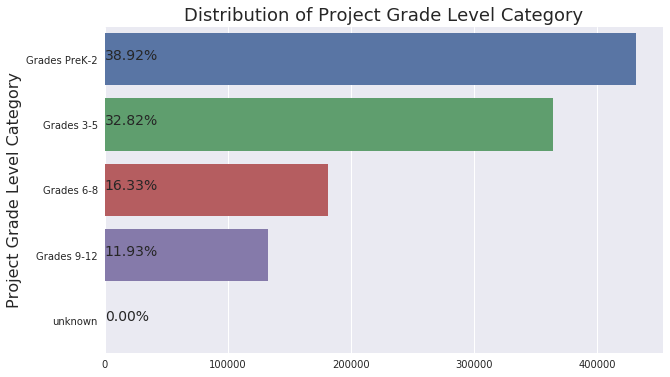

In [19]:

temp = projects['Project Grade Level Category'].value_counts().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='Project Grade Level Category',y='index',data=temp)
total = temp['Project Grade Level Category'].sum()
plt.ylabel("Project Grade Level Category",fontsize=16)
plt.xlabel("")
plt.title("Distribution of Project Grade Level Category",fontsize=18)
for i,v in enumerate(temp['Project Grade Level Category']):
    plt.text(0,i,"{:.2f}%".format(float(v)/total*100),fontsize=14)

We learn most of projects focus on serving children under Grades 5.

## <a id='39'>3.9. Project Resource Category</a>

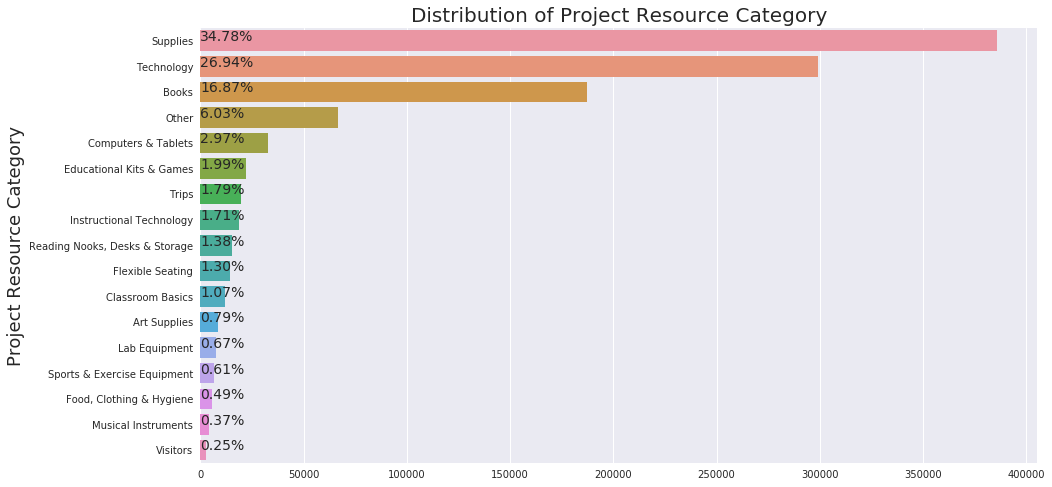

In [20]:
temp = projects['Project Resource Category'].value_counts().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x='Project Resource Category',y='index',data=temp)
total = temp['Project Resource Category'].sum()
plt.xlabel("")
plt.ylabel("Project Resource Category",fontsize=18)
plt.title("Distribution of Project Resource Category",fontsize=20)
for i,v in enumerate(temp['Project Resource Category']):
    plt.text(0,i,"{:.2f}%".format(float(v)/total*100),fontsize=14)

Most of projects require resources from supplies and technology.

## <a id='310'>3.10. Project Cost</a>

/homes/li2566/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



Text(0.5,1,'Distribution of project costs')

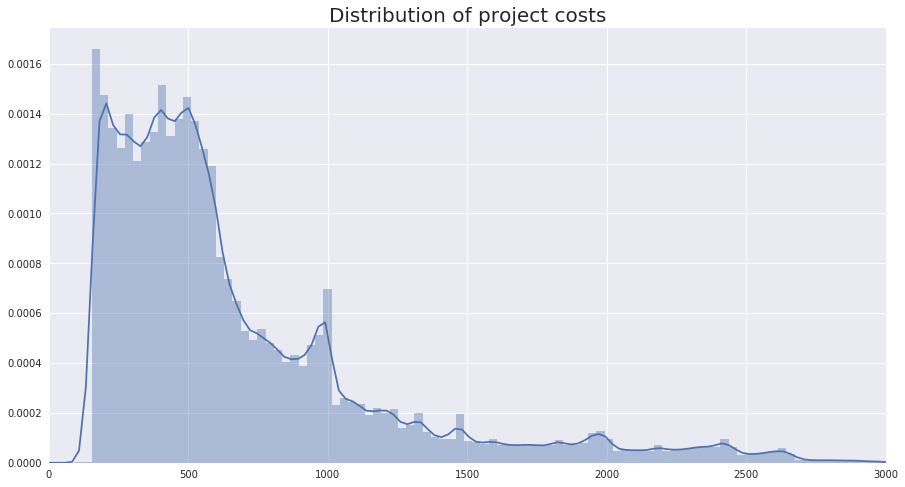

In [21]:
threshold = 3000
temp = projects[['Project Cost']]
plt.figure(figsize=(15,8))
sns.distplot(temp[temp['Project Cost'] < threshold],bins=100)
plt.xlim([0,3001])
plt.title("Distribution of project costs",fontsize=20)

We learn most of costs are under $600.

## <a id='311'>3.11. Project Current Status</a>

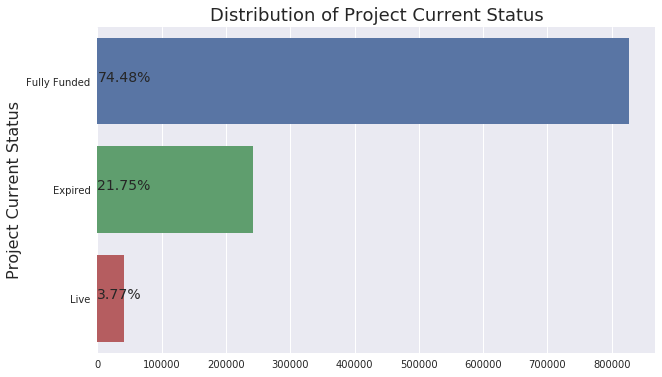

In [22]:
temp = projects['Project Current Status'].value_counts().sort_values(ascending=False).reset_index()[:20]
plt.figure(figsize=(10,6))
sns.barplot(x='Project Current Status',y='index',data=temp)
total = temp['Project Current Status'].sum()
plt.xlabel("")
plt.ylabel("Project Current Status",fontsize=16)
plt.title("Distribution of Project Current Status",fontsize=18)
for i,v in enumerate(temp['Project Current Status']):
    plt.text(0,i,"{:.2f}%".format(float(v)/total*100),fontsize=14)

2 thirds of projects are well-funded and a fifth is expired.

## <a id='312'>3.12. Donor Distribution Among States</a>

In [23]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'District of Columbia': 'DC',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}
donors_state = donors['Donor State'].value_counts().drop('other',axis=0)
data = [dict(
        type = "choropleth",
        #locations = donors_state.index.str,
        locations = donors_state.index.map(lambda x: us_state_abbrev[x]),
        locationmode = 'USA-states',
        z = donors_state.values,
        #text = donors_state.index,
        colorscale = 'Red',
        marker = dict(line=dict(width=0.7)),
        colorbar = dict(title='Number of Donors')
    )]
layout = dict(
        title = 'Number of Donor Distribution Among States',
        geo = dict(
            scope='usa',
            showframe = False,
            showcoastlines = True,
            projection=dict( type='albers usa' ),
        )
    )
fig = dict(data=data, layout=layout)
offline.iplot(fig)

## <a id='313'>3.13. Donor Is Teacher</a>

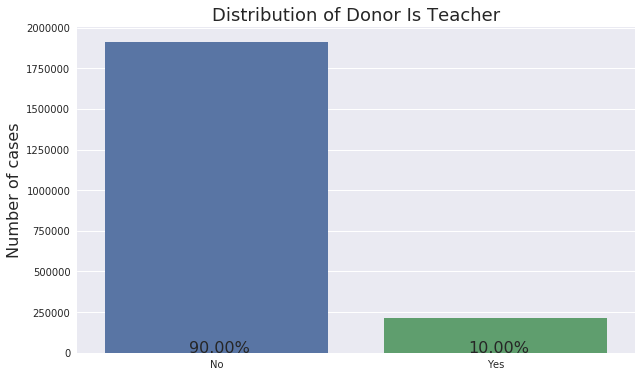

In [24]:
donor_teacher = donors['Donor Is Teacher'].value_counts().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='index',y='Donor Is Teacher',data=donor_teacher)
total = donor_teacher['Donor Is Teacher'].sum()
plt.xlabel("")
plt.ylabel("Number of cases",fontsize=16)
plt.title("Distribution of Donor Is Teacher",fontsize=18)
for i,v in enumerate(donor_teacher['Donor Is Teacher']):
    plt.text(i-0.1,0,"{:.2f}%".format(float(v)/total*100),fontsize=16)

only 10% of donors are teachers.

## <a id='314'>3.14. Resource Costs</a>

In [25]:
temp = resources[~resources['Resource Quantity'].isnull() & ~resources['Resource Unit Price'].isnull()][['Resource Quantity','Resource Unit Price']]
temp['Resource Quantity'] = temp['Resource Quantity'].astype(float)
temp['Resource Unit Price'] = temp['Resource Unit Price'].astype(float)
temp['total_cost'] = temp['Resource Quantity'].mul(temp['Resource Unit Price'])

# 
threshold = 1000
print("Number of resources is {}".format(len(temp)))
print("Number of resources greater than {} is {}".format(threshold,(temp['total_cost'] > threshold).sum()))

Number of resources is 7186136
Number of resources greater than 1000 is 81452


We know most of resources cost are less than \$1000. we then only focus on those whose costs are less than \$1000.

/homes/li2566/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



Text(0.5,1,'Distribution of Total Resource Costs')

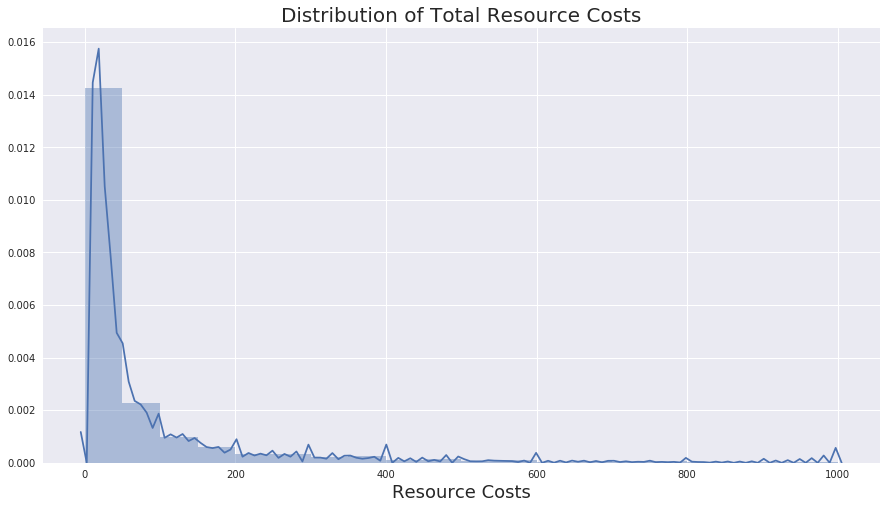

In [26]:
temp = temp[temp['total_cost'] <= 1000]
plt.figure(figsize=(15,8))
sns.distplot(temp['total_cost'],bins=20)
plt.xlabel("Resource Costs",fontsize=18)
plt.title("Distribution of Total Resource Costs",fontsize=20)

Most of resources cost are less than \$100.

## <a id='315'>3.15. School Type</a>

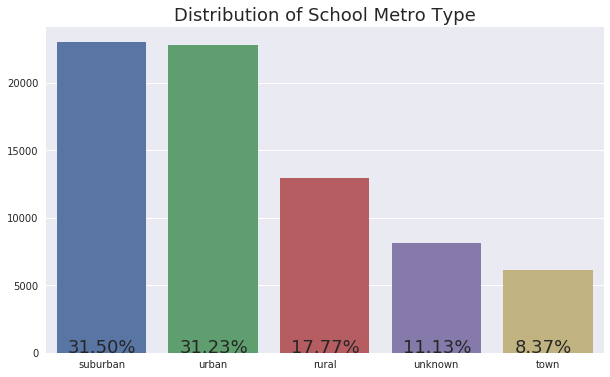

In [27]:
school_type = schools['School Metro Type'].value_counts().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='index',y='School Metro Type',data=school_type)
plt.title("Distribution of School Metro Type",fontsize=18)
plt.xlabel("")
plt.ylabel("")
total = school_type['School Metro Type'].sum()
for i,v in enumerate(school_type['School Metro Type']):
    plt.text(i-0.3,0,"{:.2f}%".format(float(v)/total*100),fontsize=18)

Most of schools getting donations are suburban and urban types.

## <a id='316'>3.16. School Percentage Free Lunch</a>

/homes/li2566/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



Text(0.5,1,'Distribution of School Percentage Free Lunch')

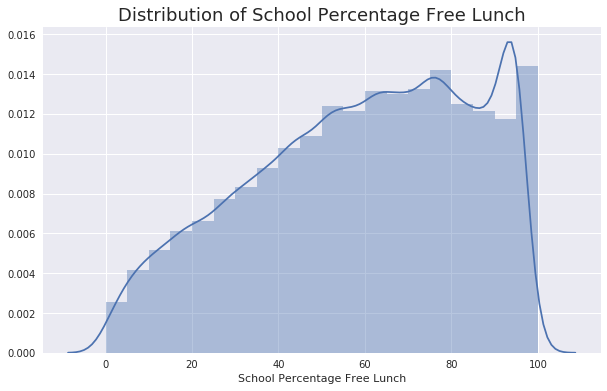

In [28]:
plt.figure(figsize=(10,6))
sns.distplot(schools["School Percentage Free Lunch"].dropna(),bins=20)
plt.title("Distribution of School Percentage Free Lunch",fontsize=18)

## <a id='317'>3.17. School Locations Distribution Among States</a>

In [29]:
school_state = schools['School State'].dropna().value_counts()
data = [dict(
        type = "choropleth",
        #locations = donors_state.index.str,
        locations = school_state.index.map(lambda x: us_state_abbrev[x]),
        locationmode = 'USA-states',
        z = school_state.values,
        colorscale = 'Blue',
        marker = dict(line=dict(width=0.7)),
        colorbar = dict(title='Number of Schools')
    )]
layout = dict(
        title = 'Number of Schools Among States',
        geo = dict(
            scope='usa',
            showframe = False,
            showcoastlines = True,
            projection=dict( type='albers usa' ),
        )
    )
fig = dict(data=data, layout=layout)
offline.iplot(fig)

## <a id='318'>3.18. Teacher Prefix</a>

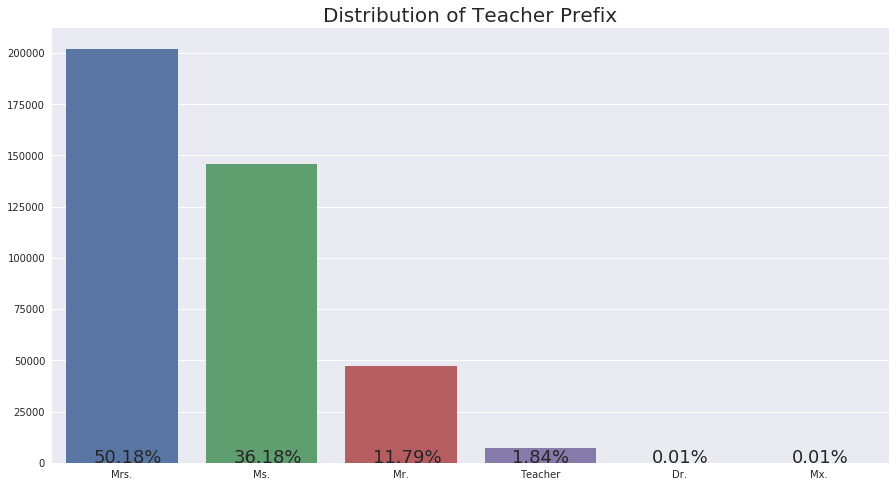

In [30]:
teacher_gender = teachers['Teacher Prefix'].dropna().value_counts().reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x='index',y='Teacher Prefix',data=teacher_gender)
plt.xlabel("")
plt.ylabel("")
total = teacher_gender['Teacher Prefix'].sum()
plt.title("Distribution of Teacher Prefix",fontsize=20)
for i,v in enumerate(teacher_gender['Teacher Prefix']):
    plt.text(i-0.2,0,"{:.2f}%".format(float(v)/total*100),fontsize=18)

It seems most of teachers are females.

## <a id='319'>3.19. Top 100 Donor Distribution Among Cities</a>

In [31]:
donors_location = donors[donors['Donor State'] != 'other'][['Donor City','Donor State']]
donors_location = donors_location.loc[~donors_location['Donor City'].isnull(),]
donors_city = donors_location['Donor City'].astype(str) + ', ' + donors_location['Donor State'].astype(str)
donors_city = donors_city.value_counts().sort_values(ascending=False)[:100].to_frame()
donors_city.columns = ['Count']

In [32]:
# Get the location of each city and plot it
#geolocator = Nominatim()
#for city in donors_city.index:
#    loc = geolocator.geocode(city)
#    if loc:
#        donors_city.loc[city,'lon'] = loc.longitude
#        donors_city.loc[city,'lat'] = loc.latitude
#        time.sleep(1) # we cannot query geolocator too frequently

# we load the longitude and latitude of cities directly, which comes from the above commented codes
donors_city['lon'] = [ 
    -87.6244212,   -73.9866136,   -73.9495823,   -84.11721147,  -73.3676149,
    -95.3676974,  -122.3300624,   -75.1635755,   -84.3901849,  -122.6741949,
    -86.1583502,   -97.7436995,   -80.8431268,   -77.0366456,   -80.1936589,
    -117.1627714,  -112.0773456,   -93.2654692,  -104.984696,    -96.7968559,
    -84.0665224,   -97.5103397,   -90.1978889,  -122.2713563,   -98.4951405,
    -115.149225,    -82.458444,    -79.9900861,   -85.759407,    -81.3794368,
    -78.6390989,   -93.1015026,   -76.610759,    -87.922497,    -71.0595678,
    -121.4943996,   -81.655651,    -83.0007065,   -84.5124602,   -74.1496048,
    -73.83669616,  -97.3327459,   -80.1433786,   -90.0516285,   -94.5630298,
    -77.43428,     -78.9018115,  -111.9783931,  -119.0194639,  -110.9262353,
    -86.7743531,   -77.09024765,  -81.6934446,   -89.3837613,   -77.0841585,
    -118.15804932,  -95.9929113,   -89.97500545, -106.6509851,   -86.8024326,
    -82.3984882,   -95.2621553,  -122.2728639,  -114.9819235,   -79.9402728,
    -79.7919754,   -94.63275393,  -78.7811925,   -95.8243956,  -117.8259819,
    -80.2440518,  -121.9885719,   -75.9774183,   -81.0998342,   -85.6678639,
    -95.4172549,  -105.0166498,   -81.0343313,  -111.58606618,  -95.9378732,
    -111.8992365,   -80.0533746,   -84.5496148,  -122.064963,    -78.8783922,
    -80.1247667,  -118.0000166,  -104.8253485,   -91.154551,    -84.2747329,
    -80.1494901,   -83.9210261,  -117.1884542,   -84.1916069,  -121.8746789,
    -84.4970393,  -121.9999606,  -149.8948523,  -118.3406288,  -122.4886034 ]
donors_city['lat'] = [
    41.8755546,  40.7306458,  40.6501038,   9.9970987,   8.6545394,  29.7589382,
    47.6038321,  39.9524152,  33.7490987,  45.5202471,  39.7683331,  30.2711286,
    35.2270869,  38.8949549,  25.7742658,  32.7174209,  33.4485866,  44.9772995,
    39.7391428,  32.7762719,   9.9327612,  35.5377266,  38.6272733,  37.8044557,
    29.4246002,  36.1662859,  27.9477595,  40.4416941,  38.2542376,  28.5423999,
    35.7803977,  44.9504037,  39.2908816,  43.0349931,  42.3604823,  38.5815719,
    30.3321838,  39.9622601,  39.1014537,  40.5834557,  40.85703325, 32.753177,
    26.1223084,  35.1490215,  39.0844687,  37.5385087,  35.9966551,  40.7879394,
    35.3738712,  32.2218917,  36.1622296,  38.8147596,  41.5051613,  43.074761,
    38.8903961,  33.78538945, 36.1556805,  30.03280175, 35.0841034,  33.5206824,
    34.851354,   29.9988312,  37.8708393,  36.0391456,  32.7876012,  36.0726355,
    38.99134745, 35.7882973,  29.7857853,  33.6856969,  36.0998131,  37.5482697,
    36.8529841,  32.0835407,  42.9632405,  30.0798826,  39.613321,   34.0007493,
    33.436188,   41.2587317,  33.5091215,  26.7153425,  33.9528472,  37.9063131,
    42.8867166,  26.2378597,  33.6783336,  38.8339578,  30.4507462,  34.0709576,
    26.0112014,  35.9603948,  33.5777524,  39.7589478,  37.6624312,  38.0464066,
    37.8215929,  61.2163129,  33.8358492,  37.5053381 ]

In [33]:
text = donors_city.index.astype(str) + ', Number of donors: ' + donors_city.Count.astype(str)
data = [dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = donors_city.lon,
        lat = donors_city.lat,
        text = text,
        mode = 'markers',
        marker = dict(
            size = np.log2(donors_city.Count.div(10),),
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            #symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            cmin = 0,
            color = donors_city.Count,
            cmax = max(donors_city.Count),
            colorbar=dict(
                title="Number of Donors"
            )
        ))]

layout = dict(
        title = 'Distribution of Donors Across Cities',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )

fig = dict(data=data, layout=layout)
offline.iplot(fig)

## <a id='320'>3.20. Top Resource Vendors</a>

/homes/li2566/.local/lib/python2.7/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/homes/li2566/.local/lib/python2.7/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



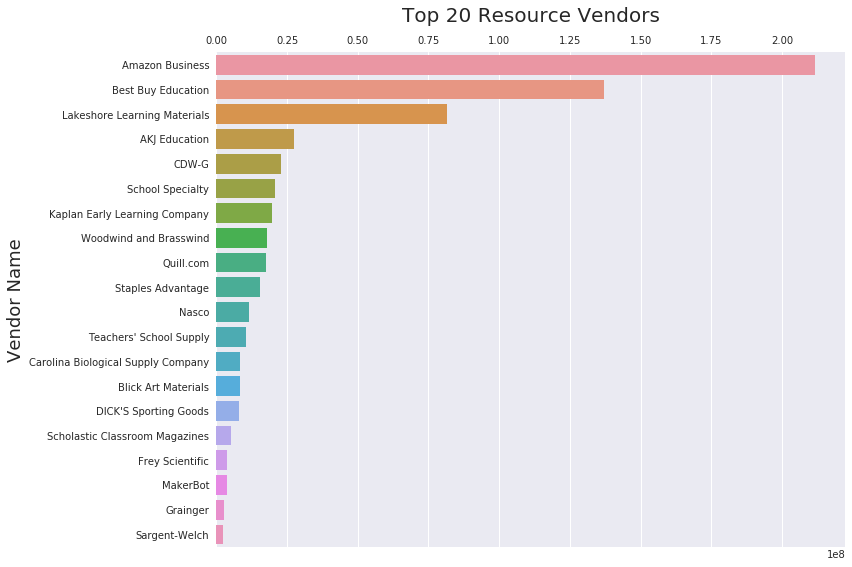

In [34]:
top = 20
temp = resources[~resources['Resource Vendor Name'].isnull()]
temp.loc[:,'total_costs'] = temp.loc[:,'Resource Quantity'].mul(temp.loc[:,'Resource Unit Price'])
data = temp.groupby('Resource Vendor Name')['total_costs'].sum().sort_values(ascending=False)[:20].reset_index()
plt.figure(figsize=(12,8))
ax = sns.barplot(y='Resource Vendor Name',x='total_costs',data=data)
plt.title("Top {} Resource Vendors".format(top),fontsize=20,y=1.05)
plt.ylabel("Vendor Name",fontsize=18)
plt.xlabel("")
ax.xaxis.set_label_position('top') 
ax.xaxis.tick_top()
plt.tight_layout()

## <a id='321'>3.21. Top Keywords From Project Title</a>

## <a id='322'>3.22. Top Keywords From Project Essay</a>

## <a id='323'>3.23. Top Keywords From Project Short Description</a>

## <a id='324'>3.24. Top Keywords From Project Need Statement</a>

# <a id='4'>4. In-Depth Exploratory Data Analysis</a>

## <a id='41'>4.1. Donation Amounts vs. Project Cost</a>

From **project** and **resource** dataframe, we check if the projects are fully funded and if the existence of fully funded date really reflect its fully-fundedness.

In [35]:
simplified_donation = donations[['Donation Amount','Project ID']].groupby("Project ID").sum().reset_index()
merged = projects.merge(simplified_donation,
                       how='inner',
                       on='Project ID')
merged['Donation Amount'] = merged['Donation Amount'].astype(float)
merged['funding_gap'] = merged['Project Cost'].subtract(merged['Donation Amount'])
merged.head()

,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Project Current Status,Project Fully Funded Date,Donation Amount,funding_gap
0,7685f0265a19d7b52a470ee4bac883ba,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,25,Teacher-Led,Stand Up to Bullying: Together We Can!,Did you know that 1-7 students in grades K-12 ...,Did you know that 1-7 students in grades K-12 ...,"My students need 25 copies of ""Bullying in Sch...",Applied Learning,"Character Education, Early Development",Grades PreK-2,Technology,361.80,2013-01-01,2013-05-30,Fully Funded,2013-01-11,230.50,131.30
1,f9f4af7099061fb4bf44642a03e5c331,08b20f1e2125103ed7aa17e8d76c71d4,cca2d1d277fb4adb50147b49cdc3b156,3,Teacher-Led,Learning in Color!,"Help us have a fun, interactive listening cent...","Help us have a fun, interactive listening cent...","My students need a listening center, read alon...","Applied Learning, Literacy & Language","Early Development, Literacy",Grades PreK-2,Technology,512.85,2013-01-01,2013-05-31,Expired,NaN,29.00,483.85
2,afd99a01739ad5557b51b1ba0174e832,1287f5128b1f36bf8434e5705a7cc04d,6c5bd0d4f20547a001628aefd71de89e,1,Teacher-Led,Help Second Grade ESL Students Develop Languag...,Visiting or moving to a new place can be very ...,Visiting or moving to a new place can be very ...,My students need beginning vocabulary audio ca...,Literacy & Language,ESL,Grades PreK-2,Supplies,435.92,2013-01-01,2013-05-30,Fully Funded,2013-05-22,426.21,9.71
3,c614a38bb1a5e68e2ae6ad9d94bb2492,900fec9cd7a3188acbc90586a09584ef,8ed6f8181d092a8f4c008b18d18e54ad,40,Teacher-Led,Help Bilingual Students Strengthen Reading Com...,Students at our school are still working hard ...,Students at our school are still working hard ...,My students need one copy of each book in The ...,Literacy & Language,"ESL, Literacy",Grades 3-5,Books,161.26,2013-01-01,2013-05-31,Fully Funded,2013-02-06,161.26,0.00
4,ec82a697fab916c0db0cdad746338df9,3b200e7fe3e6dde3c169c02e5fb5ae86,893173d62775f8be7c30bf4220ad0c33,2,Teacher-Led,Help Us Make Each Minute Count!,"""Idle hands"" were something that Issac Watts s...","""Idle hands"" were something that Issac Watts s...","My students need items such as Velcro, two pou...",Special Needs,Special Needs,Grades 3-5,Supplies,264.19,2013-01-01,2013-05-30,Fully Funded,2013-01-01,195.56,68.63


By peeking the dataframe we know there are many projects which are fully funded but there exists funding gap.

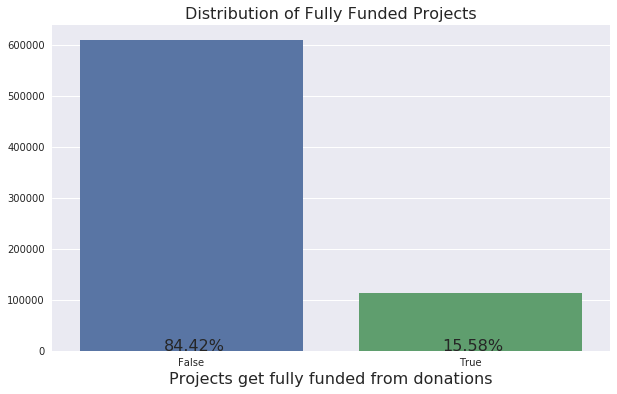

In [36]:
temp = merged[merged['Project Current Status'] == 'Fully Funded'][['Project Current Status','funding_gap']]
temp['well_funded'] = (temp['funding_gap'] <= 0)
counts = temp['well_funded'].value_counts().reset_index()
total = counts['well_funded'].sum()
plt.figure(figsize=(10,6))
sns.barplot(x='index',y='well_funded',data=counts)
plt.xlabel("Projects get fully funded from donations",fontsize=16)
plt.ylabel("")
plt.title("Distribution of Fully Funded Projects",fontsize=16)
for i,v in enumerate(counts['well_funded']):
    plt.text(i-0.1,0,"{:.2f}%".format(float(v)/total*100),fontsize=16)

Over 80% of projects that claim fully-fundedness are not fully funded from donations only. Now we plot the distribution of funding gaps, regardless whether their status.

/homes/li2566/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



Text(0.5,1,'Distribution of funding gaps between 0 and 1000')

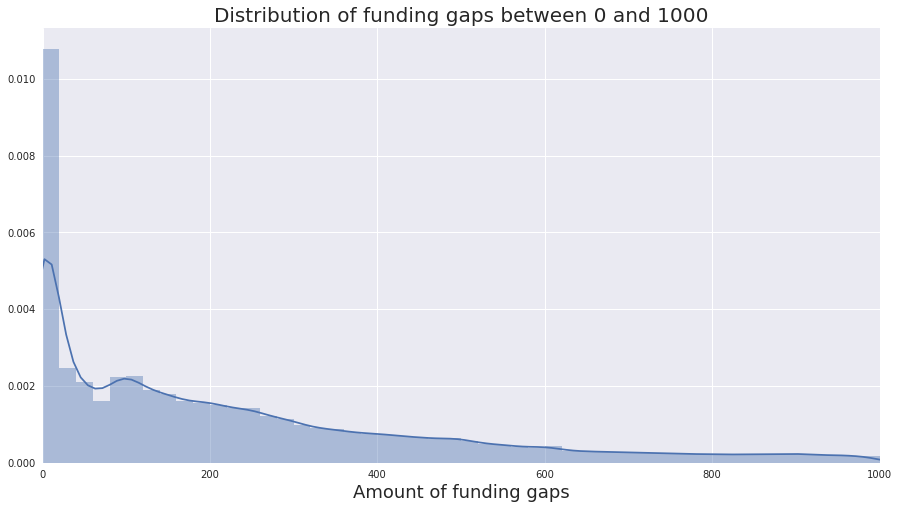

In [37]:
lb,ub = 0,1000
temp = merged[(lb <= merged['funding_gap']) & (merged['funding_gap'] < ub)]['funding_gap']
plt.figure(figsize=(15,8))
sns.distplot(temp,bins = 50)
plt.xlim([0,1000])
plt.xlabel("Amount of funding gaps",fontsize=18)
plt.title("Distribution of funding gaps between {} and {}".format(lb,ub),fontsize=20)

From the above histogram we know most of gaps are within $20.

## <a id='42'>4.2. Project Costs vs. Resource Costs</a>

In [38]:
simplified_src = resources[['Project ID','Resource Quantity','Resource Unit Price']]
simplified_src.loc[:,'resource_prices'] = simplified_src['Resource Quantity'].mul(simplified_src['Resource Unit Price'])
simplified_src = simplified_src[['Project ID','resource_prices']].groupby('Project ID').sum().reset_index()
merged = projects.merge(simplified_src,
                       how = 'inner',
                       on = 'Project ID')
merged['excess_cost'] = merged['Project Cost'].subtract(merged['resource_prices'])
merged['have_excess_cost'] = (merged['excess_cost'] > 0)

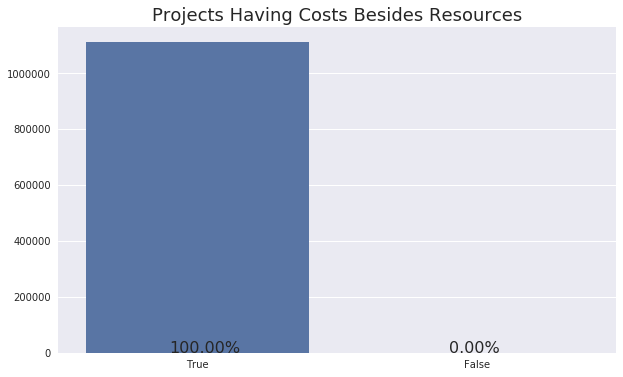

In [39]:
temp = merged['have_excess_cost'].value_counts().reset_index()
total = temp['have_excess_cost'].sum()
plt.figure(figsize=(10,6))
sns.barplot(x='index',y='have_excess_cost',data=temp,order=[True,False])
plt.title("Projects Having Costs Besides Resources",fontsize=18)
plt.xlabel("")
plt.ylabel("")
for i,v in enumerate(temp['have_excess_cost']):
    plt.text(i-0.1,0,"{:.2f}%".format(float(v)/total*100),fontsize=16)

Almost all of projects have excess costs besides resource costs.

# <a id='5'>5. Time Series Analysis</a>

The raw data contains time data like **Donation Received Date**,**Project Expiration Date**,**Project Posted Date**,**Teacher First Project Posted Date**. In this section we will use some time series analysis techniques trying to mine nontrivial information.

## <a id='51'>5.1. Time Series Visualization</a>

### <a id='511'>5.1.1. Project Posted vs. Expired Date</a>

Text(0.5,1,'Trend of Posted and Expired Projects')

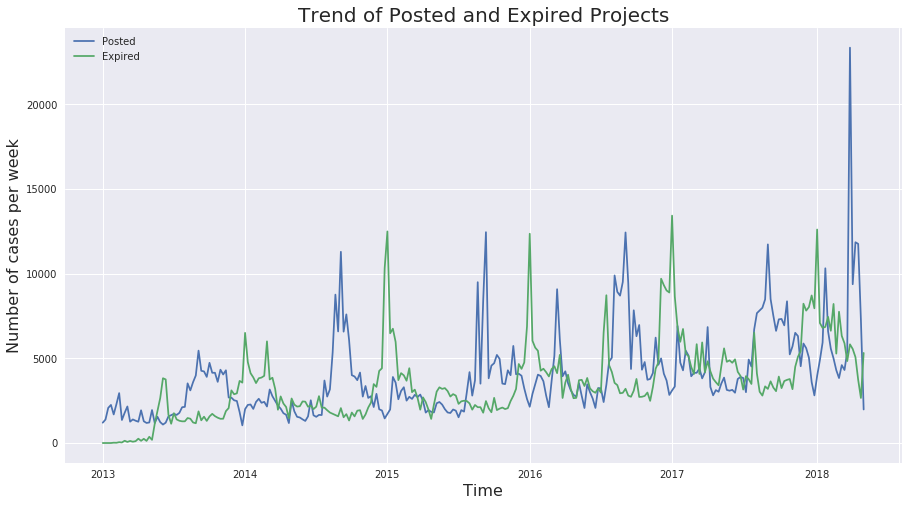

In [40]:
left = pd.to_datetime(projects['Project Posted Date']).to_frame()
left.loc[:,'posted_count'] = 1
left.sort_values(by='Project Posted Date',inplace=True)
left.set_index(keys='Project Posted Date',inplace=True)
left = left.resample('W').count()
left.set_index(left.index.to_period(freq='W'),inplace=True)

right = pd.to_datetime(projects['Project Expiration Date']).to_frame()
right.loc[:,'expired_count'] = 1
right.sort_values(by='Project Expiration Date',inplace=True)
right.set_index(keys='Project Expiration Date',inplace=True)
right = right.resample('W').count()
right.set_index(right.index.to_period(freq='W'),inplace=True)

merged = left.merge(right,left_index=True,right_index=True)
merged.head()
merged.plot(figsize=(15,8))
plt.xlabel('Time',fontsize=16)
plt.ylabel('Number of cases per week',fontsize=16)
plt.legend(['Posted','Expired'])
plt.title("Trend of Posted and Expired Projects",fontsize=20)

We learn clear seasonalities for both posted and expired projects, and we see the expired pattern is like a shifted one of posted. We will analyze it later.

### <a id='512'>5.1.2. Project Fully Funded Date</a>

Text(0.5,1,'Trend of Fully Funded Projects')

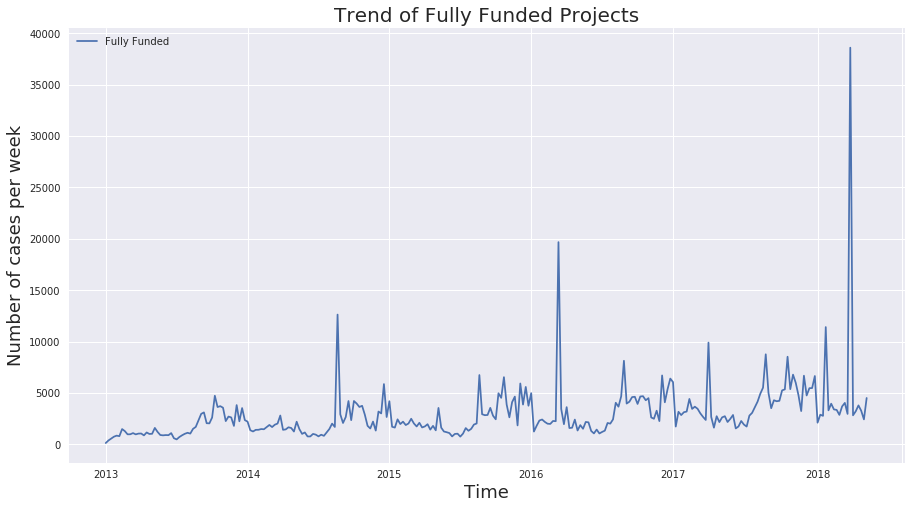

In [41]:
temp = pd.to_datetime(projects['Project Fully Funded Date']).to_frame()
temp.loc[:,'count'] = 1
temp.sort_values(by='Project Fully Funded Date',inplace=True)
temp.set_index(keys='Project Fully Funded Date',inplace=True)
temp = temp.resample('W').count()
temp.set_index(temp.index.to_period(freq='W'),inplace=True)
temp.plot(figsize=(15,8))
plt.xlabel('Time',fontsize=18)
plt.ylabel('Number of cases per week',fontsize=18)
plt.legend(['Fully Funded'])
plt.title("Trend of Fully Funded Projects",fontsize=20)

Although not obvious, there exists some seasonality in the series.

### <a id='513'>5.1.3. Teacher First Project Posted Date</a>

Text(0.5,1,'Trend of Teacher First Project Posted Date')

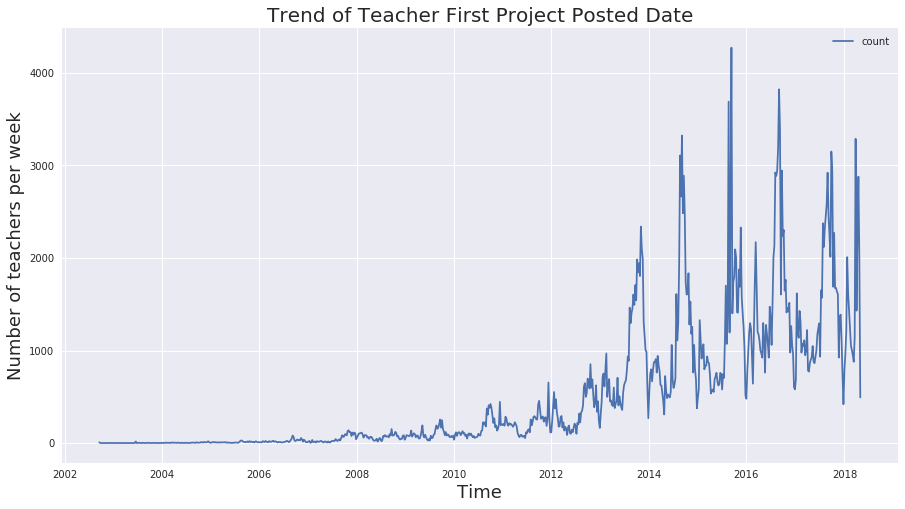

In [42]:
temp = pd.to_datetime(teachers['Teacher First Project Posted Date']).to_frame()
temp.loc[:,'count'] = 1
temp.sort_values(by='Teacher First Project Posted Date',inplace=True)
temp.set_index(keys='Teacher First Project Posted Date',inplace=True)
#temp.head()
temp = temp.resample('W').count()
temp.set_index(temp.index.to_period(freq='W'),inplace=True)
temp.plot(figsize=(15,8))
plt.xlabel('Time',fontsize=18)
plt.ylabel('Number of teachers per week',fontsize=18)
plt.title("Trend of Teacher First Project Posted Date",fontsize=20)

As we expect, the number of teachers involved in DonorsChoose is increasing each year.

### <a id='514'>5.1.4. Donations</a>

We assume **Donation Received Date** is the actual donation, although they should be very close.

### <a id='5141'>5.1.4.1. Donation Amounts and Counts</a>

In [43]:
temp = donations.loc[:,['Donation Amount','Donation Received Date']]
temp.loc[:,'Donation Received Date'] = pd.to_datetime(temp['Donation Received Date'])
temp.sort_values(by='Donation Received Date',inplace=True)
temp.set_index(keys='Donation Received Date',inplace=True)
temp = temp.resample('W').agg(['sum','count'])
temp.set_index(temp.index.to_period(freq='W'),inplace=True)
temp.columns = temp.columns.droplevel(0)

For the number of donations, the trend is increasing, while there is no significant trend for average amount of donations.

Text(0.5,1,'Trend of Donations Amounts')

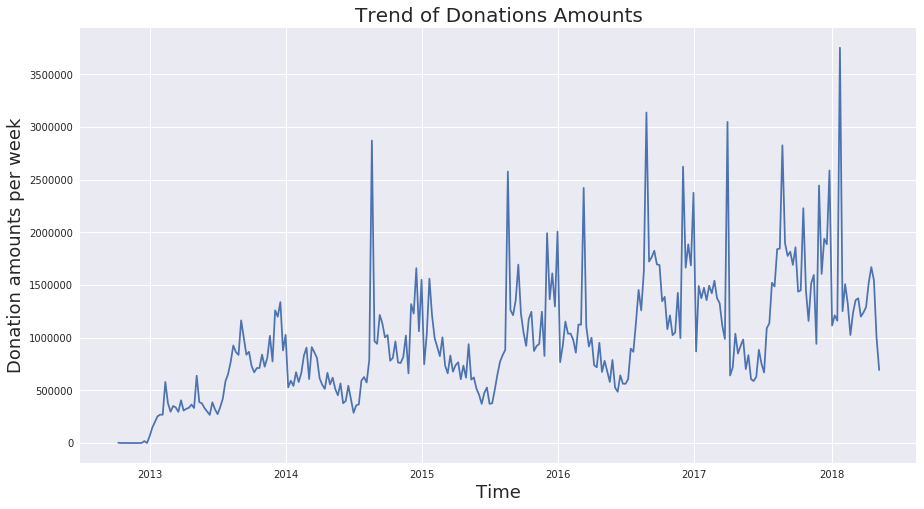

In [44]:
ax1 = temp['sum'].plot(figsize=(15,8))
plt.xlabel('Time',fontsize=18)
plt.ylabel('Donation amounts per week',fontsize=18)
plt.title("Trend of Donations Amounts",fontsize=20)

Text(0.5,1,'Trend of Donations Counts')

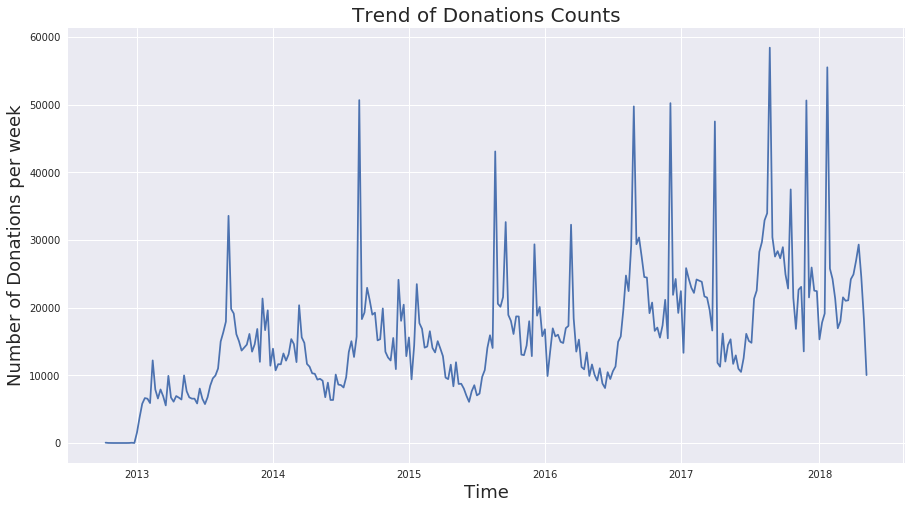

In [45]:
ax1 = temp['count'].plot(figsize=(15,8))
plt.xlabel('Time',fontsize=18)
plt.ylabel('Number of Donations per week',fontsize=18)
plt.title("Trend of Donations Counts",fontsize=20)

### <a id='5142'>5.1.4.2. Donation Counts and Average by Month</a>

Just in case, we do some summaries of donation by month and weekdays.

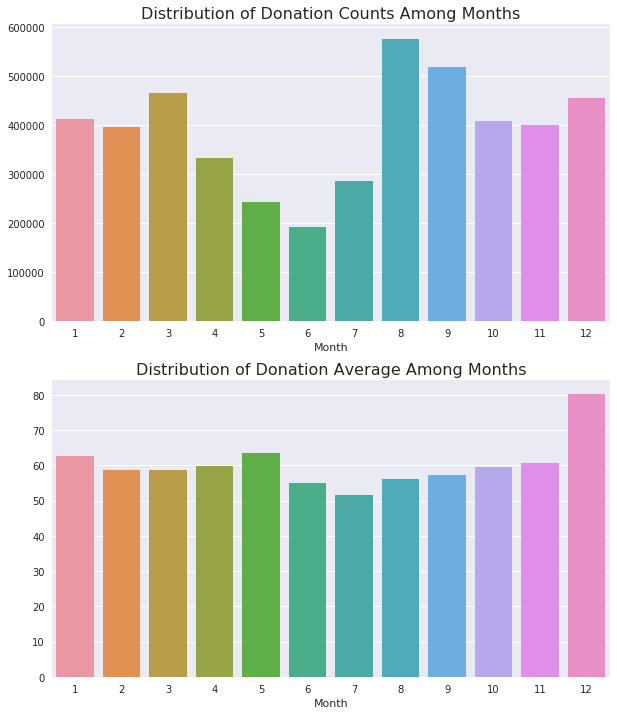

In [46]:
temp = donations[['Donation Amount','Donation Received Date']]
temp.loc[:,'Donation Received Date'] = pd.to_datetime(temp['Donation Received Date'])
temp.loc[:,'Month'] = temp['Donation Received Date'].dt.month
count_mean = temp.groupby('Month')['Donation Amount'].agg(['count','mean']).sort_index()
count_mean.rename(columns={'count':'Counts','mean':'Average'},inplace=True)
fig = plt.figure(figsize=(10,12))
for idx,col in enumerate(count_mean.columns):
    ax = fig.add_subplot(int(str(21)+str(idx+1)))
    sns.barplot(x=count_mean.index,y=col,data=count_mean,ax=ax)
    ax.set_title("Distribution of Donation {} Among Months".format(col),fontsize=16)
    plt.ylabel("")

### <a id='5143'>5.1.4.3. Donation Counts and Average by Weekday</a>

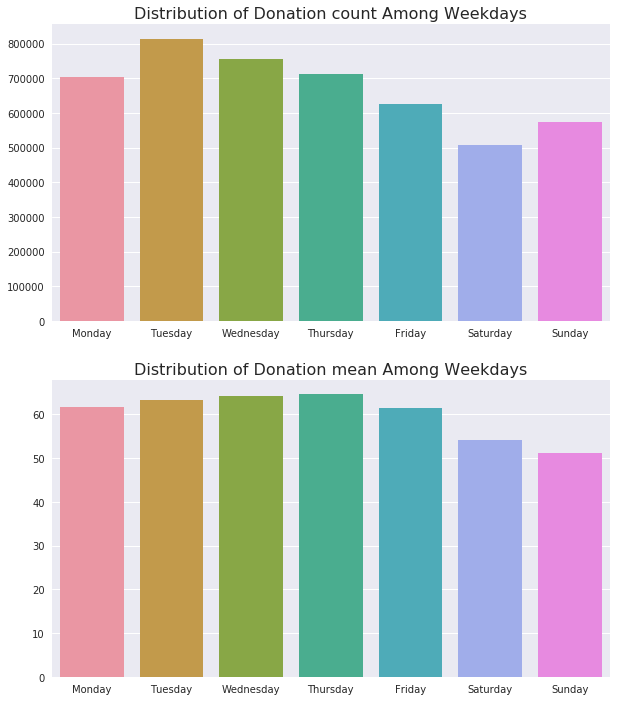

In [47]:
temp = donations[['Donation Amount','Donation Received Date']]
temp.loc[:,'Donation Received Date'] = pd.to_datetime(temp['Donation Received Date'])
temp.loc[:,'Month'] = temp['Donation Received Date'].dt.weekday
count_mean = temp.groupby('Month')['Donation Amount'].agg(['count','mean']).sort_index()
count_mean.rename(columns={'count':'Counts','mean':'Average'})
count_mean.rename(index={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'},inplace=True)
fig = plt.figure(figsize=(10,12))
for idx,col in enumerate(count_mean.columns):
    ax = fig.add_subplot(int(str(21)+str(idx+1)))
    sns.barplot(count_mean.index,count_mean[col],ax=ax)
    ax.set_title("Distribution of Donation {} Among Weekdays".format(col),fontsize=16)
    plt.ylabel("")
    plt.xlabel("")

From the above figures, we learn that the number of donations decreases in the period from June to July, which coincides with the summer section. As to the weeksays we didn't see any noticeable trend.

### <a id='515'>5.1.5. Trend of Donations Among States</a>

### <a id='516'>5.1.6. Trend of Top 10 Cities of Donations</a>

## <a id='52'>5.2. Time Series Modeling</a>

In this section, we will try ARIMA and LSTM to model the time series.

### <a id='521'>5.2.1. Trend of Project Posted Counts</a>

Here we will try to fit ARIMA model to the number of posted projects as a time series. let's get some intuition by plotting the series.

Text(0.5,0,'')

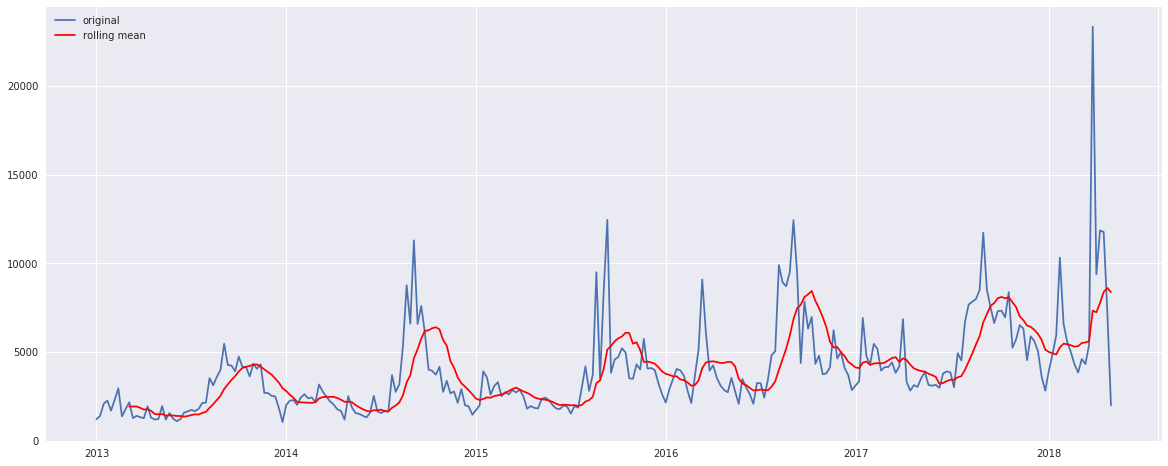

In [48]:
temp = pd.to_datetime(projects['Project Posted Date']).to_frame()
temp.loc[:,'count'] = 1
temp.sort_values(by='Project Posted Date',inplace=True)
temp.set_index(keys='Project Posted Date',inplace=True)
temp = temp.resample('W').count()
temp.set_index(temp.index.to_period(freq='W'),inplace=True)
ax1 = temp['count'].plot(figsize=(20,8))
mean = temp['count'].rolling(window=10).mean()
mean.plot(ax=ax1,color='r')
plt.legend(['original','rolling mean'])
plt.xlabel("")

From the above graph we learn there exists patterns that repeats every year. This is called the seasonality and play a part in statistical modeling. Note that in ARIMA model it's assumed that no seasonality exists. So we have to remove the seasonality to fit the ARIMA model. We do this by subtracting the shifted series from the original one.

Text(0.5,0,'')

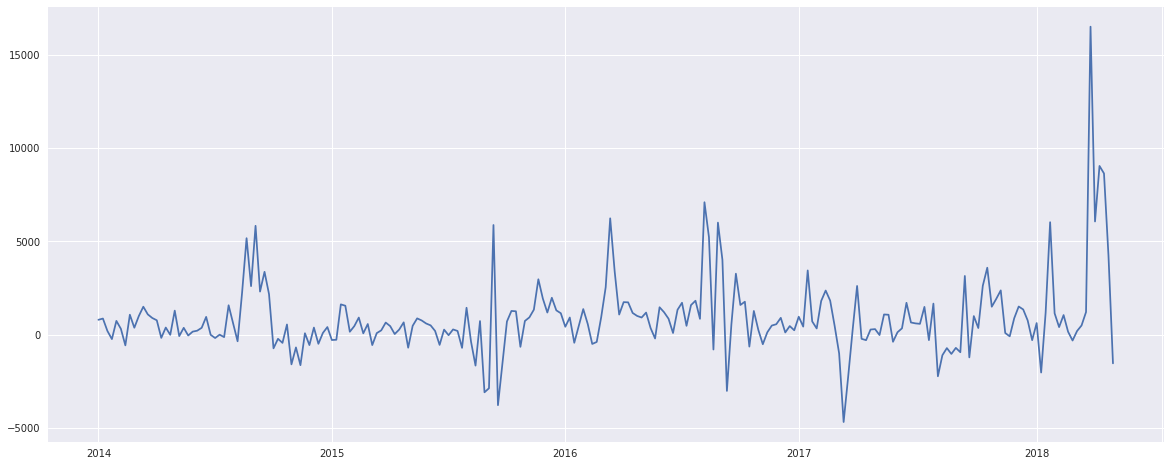

In [49]:
shifted = 52
temp.loc[:,'shifted_count'] = temp['count'].shift(shifted)
temp.loc[:,'diff_count'] = temp['count'].subtract(temp['shifted_count'])
temp.diff_count.plot(figsize=(20,8))
plt.xlabel("")

The difference now looks like a random series, that is, every point is drawn from some unknown distribution randomly. But we need more evidence to prove our assumption. Fortunately, statistics provides several tools to help decide the nonseasonality(stationarity) of a time series, one of which is <a href="https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test">augmented Dickey-Fuller test</a>, which is aim to test the stationarity of the time series. The more negative the test statistic is, the more likely the time series is stationary.

In [50]:
test = adfuller(temp.diff_count.dropna(), autolag='AIC')
output = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags','Number of Observations Used'])
for k,v in test[4].items():
    output['Critical Value (%s)'%k] = v
print(output)

Test Statistic                -6.024578e+00
p-value                        1.466304e-07
#Lags                          4.000000e+00
Number of Observations Used    2.220000e+02
Critical Value (5%)           -2.874649e+00
Critical Value (1%)           -3.460154e+00
Critical Value (10%)          -2.573757e+00
dtype: float64


The critical value (1%) is -2.87 and the test statistic is smaller than it, which means we can assume the target series is stationary with high probability. With this, we can start modeling the series with ARIMA model. Note that ARIMA model has the parameter triple (p,d,q). In order to get intuition of what these parameters should be, we first compute its <a href="https://en.wikipedia.org/wiki/Autocorrelation">autocorrelation(ACF)</a> and <a href="https://en.wikipedia.org/wiki/Partial_correlation">partial correlation(PACF)</a>. In short, auto correlation is the correlation with its lagged copy and partial correlation is the conditional correlation version.

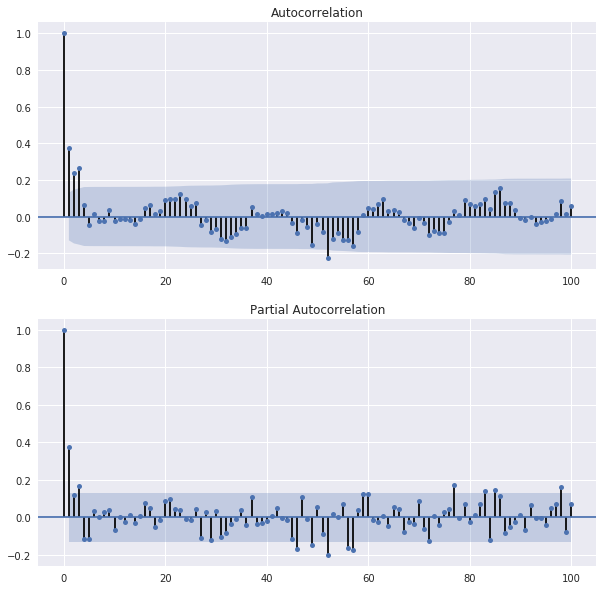

In [51]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
fig = plot_acf(temp.diff_count.dropna(), lags=100, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(temp.diff_count.dropna(), lags=100, ax=ax2)

The x-axis of the above plots are degree of delay and the y-axis is the correlation value. First note that the highest value occurs when delay=0, which is obvious since any time series is fully correlated with itself. Second, the blue region represents the confidence interval, which shows any value outside the region are very likely to be true correlation. Third, we know significant values occur when delay=1 for both plots, which implies we may need to set p and q positive.  

Here we introduce <a href="https://en.wikipedia.org/wiki/Box%E2%80%93Jenkins_method">Box-Jenkins method</a> to help us decide p and q. Since ACF looks sinusoidal and PACF has a spike at delay=1, we try (1,d,0)-ARIMA model. With some try and error we assume d=2. To validate the model we split the series into training and validation parts, and check how our model is performing on the validation set.

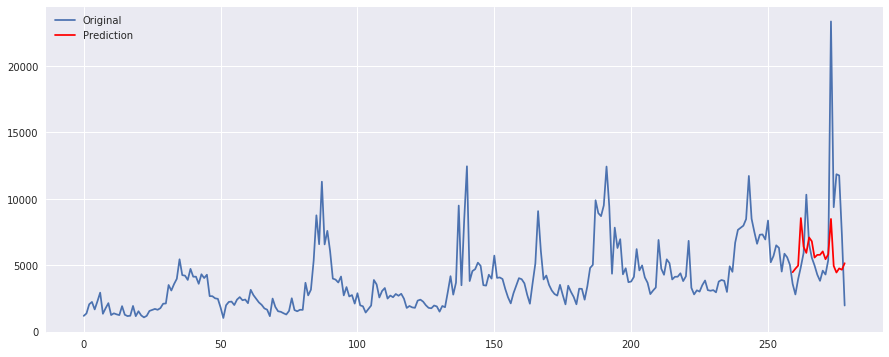

In [52]:
training = np.array(temp.diff_count.dropna())
test_len = 20
data = [x for x in training[:len(training)-test_len]]
predictions = []
for i in range(test_len):
    try:
        model = ARIMA(data, order=(1,2,0))
        ret = model.fit(disp=0)
        forecast = ret.forecast()
        prediction = forecast[0]
        predictions.append(prediction)
        data.append(testing[i])
    except:
        continue
        
# our prediction is shifted difference, we recover it by adding with the original series
values = temp['count'].values
for i in range(test_len):
    predictions[i] += values[len(temp)-shifted-test_len+i]
        
plt.figure(figsize=(15,6))
plt.plot(values)
plt.plot(pd.Series(predictions,index=range(len(temp)-test_len,len(temp))), color='red')
plt.legend(['Original','Prediction'])

It seems our model is quite accurate in validation.

### <a id='522'>5.2.2. Trend of Project Expiration Counts</a>

Here we try to analyze the time series of the number of expired projects with different approach. As usual, we need some visualization to help get intuition.

Text(0.5,0,'')

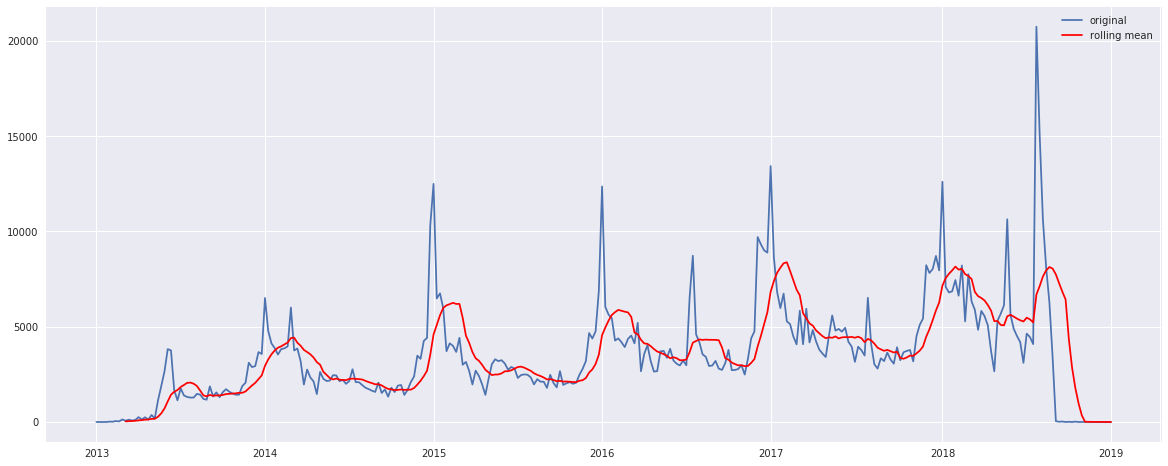

In [53]:
temp = pd.to_datetime(projects['Project Expiration Date']).to_frame()
temp.loc[:,'count'] = 1
temp.sort_values(by='Project Expiration Date',inplace=True)
temp.set_index(keys='Project Expiration Date',inplace=True)
temp = temp.resample('W').count()
temp.set_index(temp.index.to_period(freq='W'),inplace=True)
ax1 = temp['count'].plot(figsize=(20,8))
mean = temp['count'].rolling(window=10).mean()
mean.plot(ax=ax1,color='r')
plt.legend(['original','rolling mean'])
plt.xlabel("")

The tail is almost 0 and doesn't fit the rest of series. We try to get rid of it before analyzing.

Text(0.5,0,'')

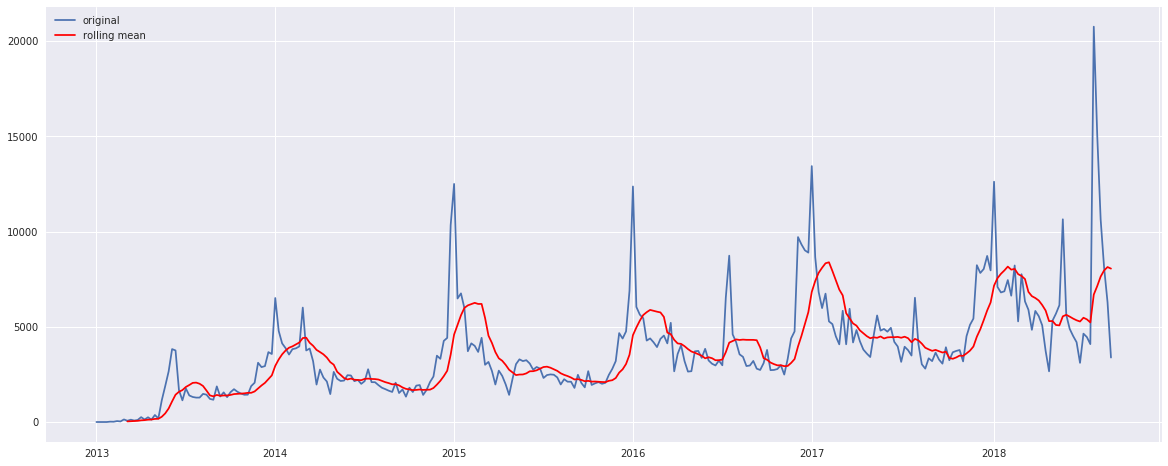

In [54]:
temp = temp.iloc[:-18,]
ax1 = temp['count'].plot(figsize=(20,8))
mean = temp['count'].rolling(window=10).mean()
mean.plot(ax=ax1,color='r')
plt.legend(['original','rolling mean'])
plt.xlabel("")

Let's analyze the seasonality and trend of this series. First we plot ACF and PACF of the original series.

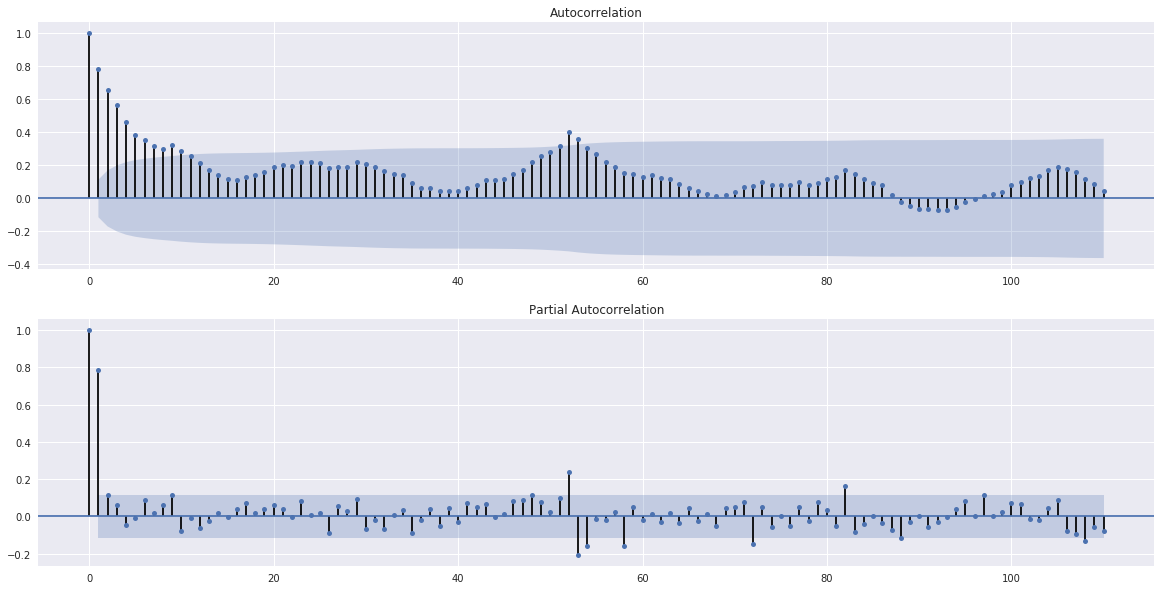

In [55]:
counts = temp['count'].values
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(211)
fig = plot_acf(counts, lags=110, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(counts, lags=110, ax=ax2)

There is a spike around delay=52, which is the evidence of existing seasonality. We remove the seasonality and plot the residue and its ACF and PACF.

Test Statistic                -7.891701e+00
p-value                        4.418778e-12
#Lags                          0.000000e+00
Number of Observations Used    2.430000e+02
Critical Value (5%)           -2.873509e+00
Critical Value (1%)           -3.457551e+00
Critical Value (10%)          -2.573148e+00
dtype: float64


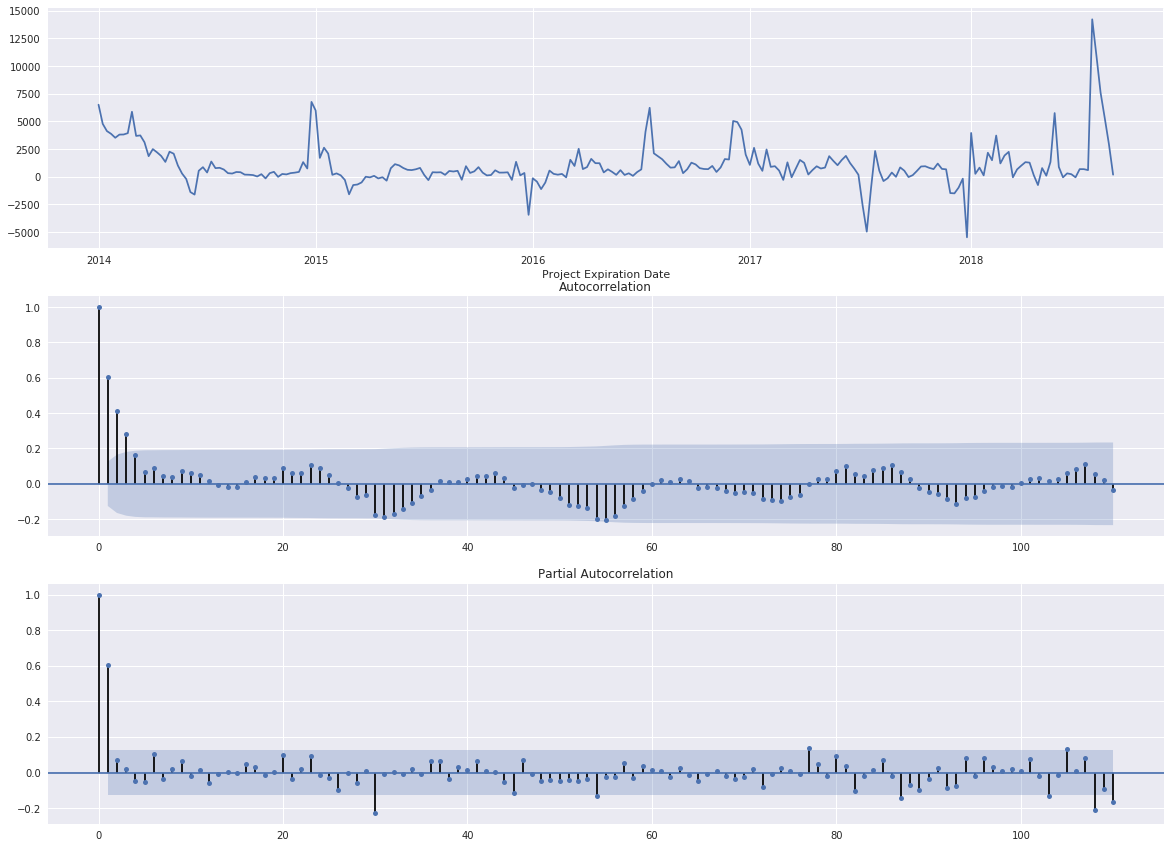

In [56]:
de_seasonality = temp['count'].subtract(temp['count'].shift(52)).dropna()
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(311)
de_seasonality.plot(ax=ax1)
ax2 = fig.add_subplot(312)
fig = plot_acf(de_seasonality, lags=110, ax=ax2)
ax3 = fig.add_subplot(313)
fig = plot_pacf(de_seasonality, lags=110, ax=ax3)

# stationarity test
test = adfuller(de_seasonality, autolag='AIC')
output = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags','Number of Observations Used'])
for k,v in test[4].items():
    output['Critical Value (%s)'%k] = v
print(output)

From augmented Dickey-Fuller test we learned the de-seasoned series is stationary with high probability. So we can model the series now. Here we apply the function <a href="http://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html">SARIMAX</a> from **statsmodels** to model our seasonal time series directly.

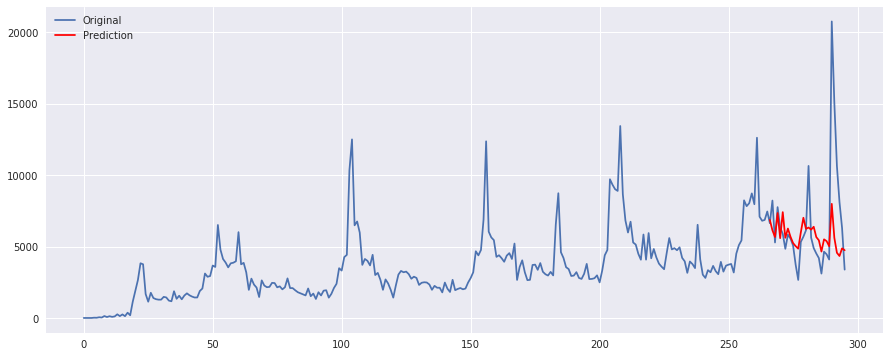

In [57]:
test_len = 30

# Since there is a spike at delay=1 for both ACF and PACF plot with de-seasoned series, we set order=(1,0,1)
# For the seasonal component, we try the most common seasonal_order=(0,1,1,period).
# You can use grid search to find best seasonal order.
model = SARIMAX(counts, trend='t', order=(1,0,1), seasonal_order=(0,1,1,52))
ret = model.fit()
predictions = ret.predict(start = len(counts)-test_len, end = len(counts)-1, dynamic = True)  
        
plt.figure(figsize=(15,6))
plt.plot(counts)
plt.plot(pd.Series(predictions,index=range(len(counts)-test_len,len(counts))), color='red')
plt.legend(['Original','Prediction'])

The above in-sample prediction depicts the trend roughly, although at some peaks the real data performs more extremely than the prediction does.

### <a id='523'>5.2.3. Trend of First Posted Project</a>

We do the same analysis as the same as previous sections.

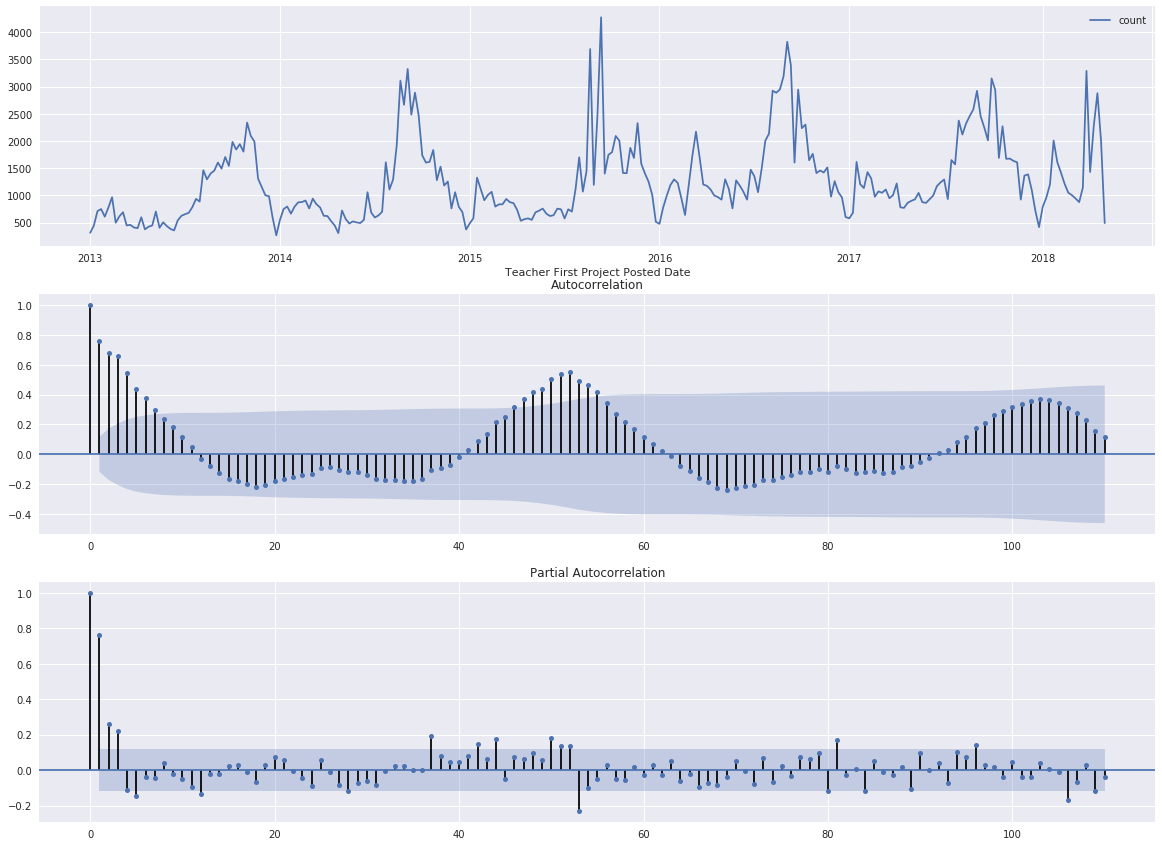

In [58]:
temp = pd.to_datetime(teachers['Teacher First Project Posted Date']).to_frame()
temp.loc[:,'count'] = 1
temp.sort_values(by='Teacher First Project Posted Date',inplace=True)
temp.set_index(keys='Teacher First Project Posted Date',inplace=True)
temp = temp.resample('W').count().dropna()
data = temp.loc['2013':,:]

# Plot the original time series, ACF and PACF
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(311)
data.plot(ax=ax1)
ax2 = fig.add_subplot(312)
fig = plot_acf(data, lags=110, ax=ax2)
ax3 = fig.add_subplot(313)
fig = plot_pacf(data, lags=110, ax=ax3)

Test Statistic                  -3.973822
p-value                          0.001554
#Lags                           18.000000
Number of Observations Used    745.000000
Critical Value (5%)             -2.865427
Critical Value (1%)             -3.439158
Critical Value (10%)            -2.568840
dtype: float64


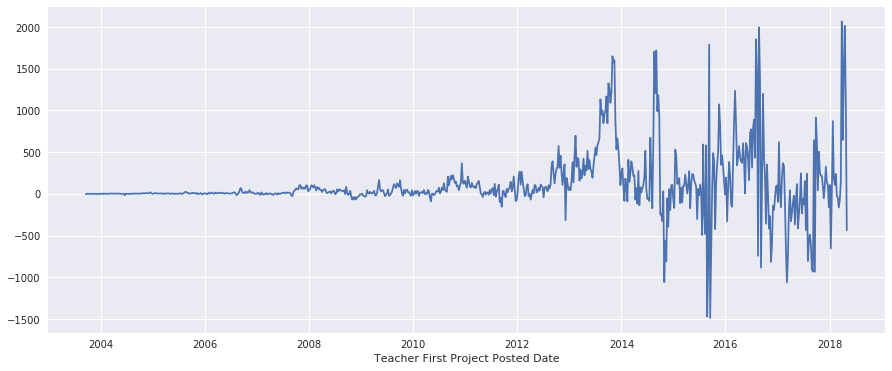

In [59]:
# de-season by taking shifted difference
de_seasonality = temp['count'].subtract(temp['count'].shift(52)).dropna()

# stationarity test
test = adfuller(de_seasonality, autolag='AIC')
output = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags','Number of Observations Used'])
for k,v in test[4].items():
    output['Critical Value (%s)'%k] = v
print(output)
plt.figure(figsize=(15,6))
de_seasonality.plot()

Although the test statistic is smaller than critival value (1%), but not so much. In this case we try to detrend by taking one more difference.

Test Statistic                -9.253002e+00
p-value                        1.474927e-15
#Lags                          1.800000e+01
Number of Observations Used    7.440000e+02
Critical Value (5%)           -2.865433e+00
Critical Value (1%)           -3.439170e+00
Critical Value (10%)          -2.568843e+00
dtype: float64


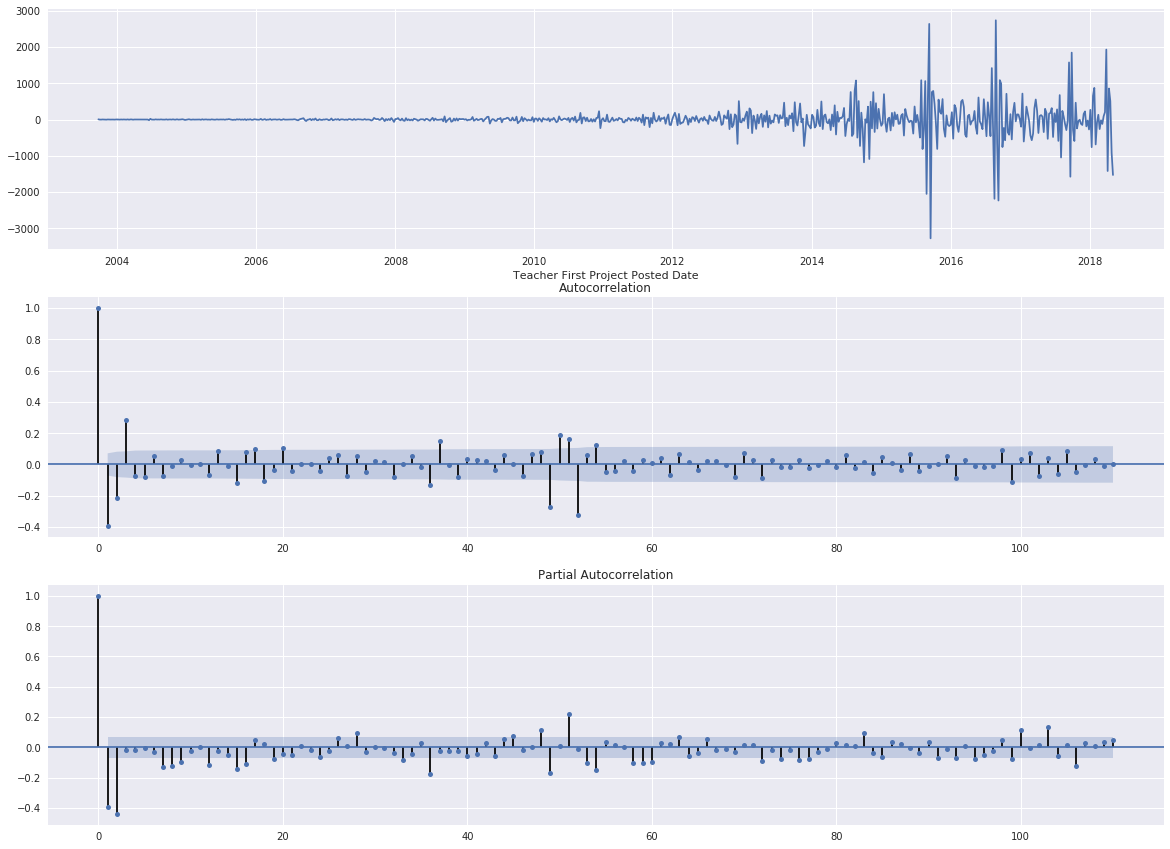

In [60]:
# detrend the sequence by taking one more diff
de_trend = de_seasonality.diff().dropna()
# stationarity test
test = adfuller(de_trend, autolag='AIC')
output = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags','Number of Observations Used'])
for k,v in test[4].items():
    output['Critical Value (%s)'%k] = v
print(output)
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(311)
de_trend.plot(ax=ax1)
ax2 = fig.add_subplot(312)
fig = plot_acf(de_trend, lags=110, ax=ax2)
ax3 = fig.add_subplot(313)
fig = plot_pacf(de_trend, lags=110, ax=ax3)

The test statistic and p-value now look OK. From ACF and PACF we find (2,d,1) may be good parameters for nonseasonal components. Here we also fit the series into SARIMAX model.

/homes/li2566/.local/lib/python2.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



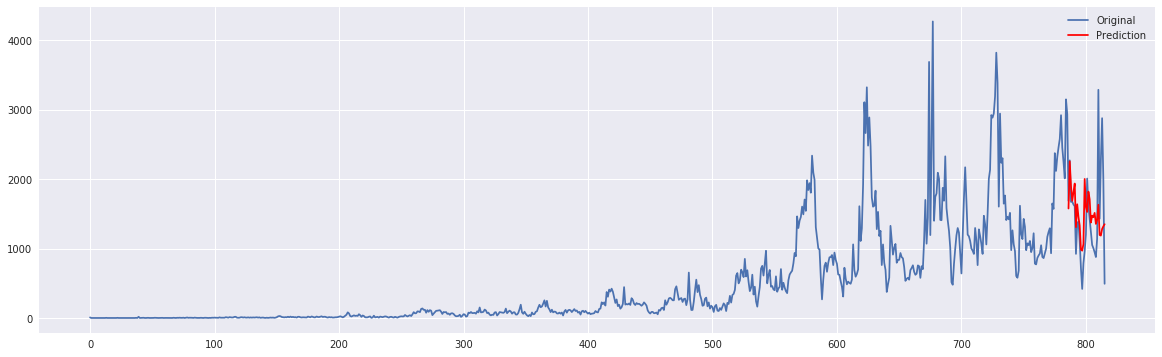

In [61]:
test_len = 30

# There is no significant spike after delay=2 in PACF and after delay=1 in ACF, so choose (2,d,1)
model = SARIMAX(temp['count'].values, trend='t', order=(2,2,1), seasonal_order=(0,1,0,52))
ret = model.fit()
predictions = ret.predict(start = len(temp)-test_len, end = len(temp)-1, dynamic = True)  
        
plt.figure(figsize=(20,6))
plt.plot(temp['count'].values)
plt.plot(pd.Series(predictions,index=range(len(temp)-test_len,len(temp))), color='red')
plt.legend(['Original','Prediction'])

The in-sample prediction seems quite accurate initially, then start deviating in the middle.

### <a id='524'>5.2.4. Trend of Donation Amounts</a>

Here we try LSTM model to model the time series. 

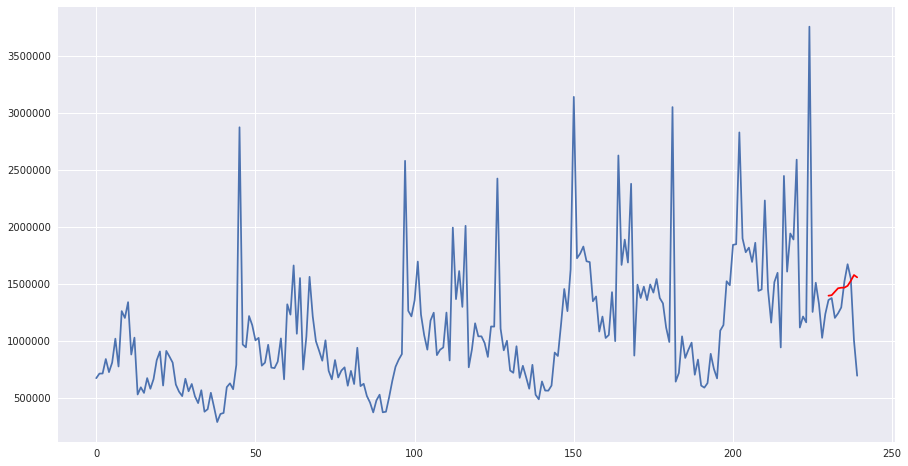

In [62]:
# parameters
time_step = 52
batch_size = 1
test_size = 10
epochs = 100

# create dataset for LSTM
data = donations.loc[:,['Donation Amount','Donation Received Date']]
data.loc[:,'Donation Received Date'] = pd.to_datetime(data.loc[:,'Donation Received Date'])
data.sort_values(by='Donation Received Date',inplace=True)
data.set_index(keys='Donation Received Date',inplace=True)
data = data.resample('W').sum()
data.set_index(data.index.to_period(freq='W'),inplace=True)

X, y = [], []
temp = data.values
scaler = MinMaxScaler(feature_range=(0, 1))
temp = scaler.fit_transform(temp)
for i in range(len(temp)-time_step):
    X.append(temp[i:(i+time_step),0])
    y.append(temp[(i+time_step),0])
X,y = np.array(X), np.array(y)
X_train, X_test = X[:(X.shape[0]-test_size),:], X[(X.shape[0]-test_size):,:]
y_train, y_test = y[:(y.shape[0]-test_size)], y[(y.shape[0]-test_size):]
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

# build LSTM model
model = Sequential()
model.add(LSTM(12,
               batch_input_shape = (batch_size,X_train.shape[1],1),
               stateful = True))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam')

# fitting model
for i in range(epochs):
    model.fit(X_train, y_train, epochs=1, batch_size=1, verbose=0, shuffle=False)
    model.reset_states()
    
# forecast
prediction = model.predict(X_test, batch_size)
prediction = scaler.inverse_transform(prediction)
y = scaler.inverse_transform([y])
y = y.flatten()

# plot prediction
plt.figure(figsize=(15,8))
plt.plot(y)
plt.plot([None]*(len(y)-test_size) + [x[0] for x in prediction],color='red')